# <center>Food is the Fuel to our Lives </center>
# <center> Are We Really Consuming the Healthiest Food?</center>

### <center>MSDS 692: Data Science Practicum I - Stacey Sandy</center>

### <u><b>Overview </b></u>
This project assignment will be working with USDA's FoodData Central Data Sets and API. The API will allow me to retrieve a variety of data from a specific data repository of my choice or from the five data types available through FoodData central. First, I will conduct an analysis of nutrient labels for two types of food: sticky rice and 100% whole wheat bread. This will include visualizations that will help compare those food types to others within the same category and find how the nutritional values compare to one another. Another analysis will follow using the Nutrient List data from the USDA Standard Reference Legacy (2018). This analysis will display the data collected on macronutrients: Carbohydrates, Polyunsaturated fat, Protein, Saturated fat, Fiber, Sugar, and Kilocalories (energy). Keep in mind that the selections within this project are primarily random. It must also be taken into consideration that each human has their own unique health history, health needs, nutritional goals, and health focus. The goal of the project is first to compare nutritional label data against other related food products. As well as to see what we should be avoiding in relation to foods ranked by macronutrients.

### <u><b>Objective</b></u>
The research question at hand is that we need food to live and food is what makes our lives either better or worst. So, are we making the best food choices? What does nutritional value in food really mean? Are we eating nutritious food or are we eating what is easy, fast, and cheap? Perhaps, we have a favorite type of food or brand, does that effect our food decisions? Are we really selecting the healthiest food options? Or is our food selection based on other nutritional values or for other reasons? What if we could look at nutritional values, compare them based on our own health needs, and then decide if our choice of food is healthiest for us or if an healthier alternative option is avialable?

### <u><b>Data</b></u>
* FoodData Central Data https://fdc.nal.usda.gov/download-datasets.html
* FoodData Central API Guide https://fdc.nal.usda.gov/api-guide.html
* Nutrient List from Standard Reference Legacy (2018) https://www.nal.usda.gov/fnic/nutrient-lists-standard-reference-legacy-2018

### <u><b>Data Documentations</b></u>
* FoodData Central Data Type https://fdc.nal.usda.gov/data-documentation.html
* Food and Nutrient Database for Dietary Studies https://www.ars.usda.gov/northeast-area/beltsville-md-bhnrc/beltsville-human-nutrition-research-center/food-surveys-research-group/docs/fndds-download-databases/

### Background: FoodData Central Data Types

FoodData Central mentions that the USDA website includes <u>five</u> data types:
1.	<b>Foundation Foods</b> – Which includes nutrient and food component values on a diverse range of ingredient and commodity foods as well as extensive underlying metadata.
2.	<b>Experimental Foods</b> – This links to relevant agricultural research data from multiple sources, such as as the Agricultural Collaborative Research Outcome System (AgCROS) (https://agcros-usdaars.opendata.arcgis.com/).
3.	<b>SR Legacy</b> – released in April 2018 and formerly hosted on the USDA Food Composition Databases website, is the final release of this data type.
4.	<b>Food and Nutrient Database for Dietary Studies 2013-2014 (FNDDS 2013-2014)</b> – contains data on the nutrient and food component values and weights for foods and beverages reported in the What We Eat in America dietary survey component of the National Health and Nutrition Examination Survey.
5. <b>USDA Global Branded Food Products Database (Branded Foods)</b> – formerly hosted on the USDA Food Composition Databases website, are data from a public-private partnership that provides values for nutrients in branded and private label foods that appear on the product label.

### History about the establishment of FoodData Central
Note that the prior USDA Food Composition Databases website (https://ndb.nal.usda.gov/) is no longer available due to the creation of FoodData Central which replaced the old USDA Food Composition Database. The USDA mentions that prior API usage on the USDA Food Composition Databases website is no longer being updated and will be discontinued in March 31, 2020

Source https://fdc.nal.usda.gov/faq.html

#### The following websites are available for direct food searchs:
* FoodData Central Search https://fdc.nal.usda.gov/index.html
* What's In The Foods You Eat Search Tool https://www.ars.usda.gov/northeast-area/beltsville-md-bhnrc/beltsville-human-nutrition-research-center/food-surveys-research-group/docs/whats-in-the-foods-you-eat-emsearch-toolem/

### Project Process:<br>
<br>
* Conduct a <b>Food Search endpoint</b> to retrieve a list of foods that match search criteria: Sticky Rice.<br>
* Exploratory Data Analysis (EDA) on retrieved food data, wrangle, clean, and create a data frame on Sticky Rice foods.<br>
* Conduct a <b>Food Details endpoint</b> to obtain detail nutritional information for each particular food: Sticky Rice.<br>
* Exploratory Data Analysis (EDA) on retrieved nutritional data, wrangle, clean, and create a data frame on Sticky Rice foods.<br>
* Compile the foods with the nutritional data.<br>
* Create visualizations with the data for analysis purposes.<br>
<br>
Repeat the above on 100% Whole Wheat bread:<br>
* Search for a list of 100% Whole Wheat Breads and EDA.<br>
* Search for nutritional data on all 100% Whole Wheat Breads from the list and EDA.<br>
* Compile the list with the nutritional data and create visualizations.<br>
<br>
In final, compare and contrast findings. Answer research questions. Did you accomplish what your project objective detailed?

## <center>Exploratory Data Analysis on FoodData Central API and Data Sets</center>

In [1]:
#Import required libraries for use within this Jupyter notebook:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json

In [2]:
# loading my specific credentials
data = pd.read_csv('FDC_API.csv',header=0)

# setting up some variables for FoodData Central. 
MY_API_KEY = data['MY_API_KEY'][0]

These are my credentials for FoodData Central API Confirm the API Key: 

In [ ]:
MY_API_KEY

From the FoodData Central API Guide (https://fdc.nal.usda.gov/api-guide.html), I will conduct a search on two of the common types of food we consume in my household: <b>sticky rice</b> and <b>100% Whole Wheat Bread</b>. <br>
<br>
For the love of carbs, my two little boys get most of their energy from rice or bread.
<br>
Using the FoodData Central <u>Food Search Endpoint</u>, I will search for a list of <b>sticky rice</b> and a list of <b>100% Whole Wheat Bread</b> contained within their databases. From these lists, I will compare nutritional label informationto see if we are making good food choices or are there healthier alternatives for us.

In [4]:
#First let's search for sticky rice products within the FoodData Central Database:

params = {'api_key': MY_API_KEY}
rice = {'generalSearchInput': 'sticky+rice', "requireAllWords":"true"}
response = requests.post(
    r'https://api.nal.usda.gov/fdc/v1/search',
    params=params,
    json=rice
)
print(response.json())

{'foodSearchCriteria': {'generalSearchInput': 'sticky+rice', 'pageNumber': 1, 'requireAllWords': True}, 'totalHits': 21, 'currentPage': 1, 'totalPages': 1, 'foods': [{'fdcId': 340469, 'description': 'Rice, white, cooked, glutinous', 'additionalDescriptions': 'sticky rice; sushi rice', 'dataType': 'Survey (FNDDS)', 'foodCode': '56205190', 'publishedDate': '2019-04-01', 'allHighlightFields': '<b>Includes</b>: <em>sticky</em> <em>rice</em>; sushi <em>rice</em>', 'score': 259.1735}, {'fdcId': 703030, 'description': 'STICKY RICE', 'dataType': 'Branded', 'gtinUpc': '782733012269', 'publishedDate': '2019-12-06', 'brandOwner': 'Preferred Brands International', 'ingredients': 'WATER, ORGANIC LONG GRAIN RICE.', 'allHighlightFields': '<b>Ingredients</b>: WATER, ORGANIC LONG GRAIN <em>RICE</em>.', 'score': 109.139275}, {'fdcId': 555829, 'description': 'STICKY-RICE CHIPS', 'dataType': 'Branded', 'gtinUpc': '859908003480', 'publishedDate': '2019-04-01', 'brandOwner': 'Dang Foods LLC', 'ingredients':

In [5]:
#Convert above JSON output into more readable format into a dictionary.

# JSON to dictionary
datatypes_dict = json.loads(response.text)

# Output the keys from this dictionary
datatypes_dict.keys()

dict_keys(['foodSearchCriteria', 'totalHits', 'currentPage', 'totalPages', 'foods'])

In [6]:
#Look at first few results
datatypes_dict['foods'][:5]

[{'fdcId': 340469,
  'description': 'Rice, white, cooked, glutinous',
  'additionalDescriptions': 'sticky rice; sushi rice',
  'dataType': 'Survey (FNDDS)',
  'foodCode': '56205190',
  'publishedDate': '2019-04-01',
  'allHighlightFields': '<b>Includes</b>: <em>sticky</em> <em>rice</em>; sushi <em>rice</em>',
  'score': 259.1735},
 {'fdcId': 703030,
  'description': 'STICKY RICE',
  'dataType': 'Branded',
  'gtinUpc': '782733012269',
  'publishedDate': '2019-12-06',
  'brandOwner': 'Preferred Brands International',
  'ingredients': 'WATER, ORGANIC LONG GRAIN RICE.',
  'allHighlightFields': '<b>Ingredients</b>: WATER, ORGANIC LONG GRAIN <em>RICE</em>.',
  'score': 109.139275},
 {'fdcId': 555829,
  'description': 'STICKY-RICE CHIPS',
  'dataType': 'Branded',
  'gtinUpc': '859908003480',
  'publishedDate': '2019-04-01',
  'brandOwner': 'Dang Foods LLC',
  'ingredients': 'ORGANIC RICE, PALM FRUIT OIL+, CANE SUGAR, WATERMELON JUICE, COCONUT MILK, SESAME SEEDS, SALT.',
  'allHighlightFields'

In [7]:
#Let's just look at the first sticky rice item:
rices = datatypes_dict['foods']
rices[0]

{'fdcId': 340469,
 'description': 'Rice, white, cooked, glutinous',
 'additionalDescriptions': 'sticky rice; sushi rice',
 'dataType': 'Survey (FNDDS)',
 'foodCode': '56205190',
 'publishedDate': '2019-04-01',
 'allHighlightFields': '<b>Includes</b>: <em>sticky</em> <em>rice</em>; sushi <em>rice</em>',
 'score': 259.1735}

In [8]:
#Let's narrow it down a bit and only look at the three data points:
for rice in rices:
    print(f"{rice['fdcId']}:     {rice['description']},   {rice['dataType']}")

340469:     Rice, white, cooked, glutinous,   Survey (FNDDS)
703030:     STICKY RICE,   Branded
555829:     STICKY-RICE CHIPS,   Branded
393840:     THAI STICKY PURPLE RICE,   Branded
670578:     COCONUT CRUNCH STICKY-RICE CHIPS,   Branded
732062:     SAVORY SEAWEED STICKY-RICE CHIPS,   Branded
671394:     SRIRACHA SPICE STICKY-RICE CHIPS,   Branded
731274:     AGED CHEDDAR STICKY-RICE CHIPS,   Branded
387586:     RESTAURANT-STYLE WHITE RICE, STICKY,   Branded
453057:     THE NATURAL HAPA, CHICKEN WITH STICKY RICE,   Branded
500627:     EIGHT WONDER, IFUGAO DIKET STICKY RICE,   Branded
398935:     EIGHT WONDER, MOUNTAIN VIOLET STICKY RICE,   Branded
584263:     TERIYAKI TOFU WITH BOK CHOY & STICKY BLACK RICE,   Branded
540063:     AJINOMOTO, BBQ SEASONED BEEF WITH VEGETABLE ON STICKY RICE,   Branded
630462:     JAPANESE-STYLE STICKY WHITE RICE, JAPANESE-STYLE,   Branded
540064:     AJINOMOTO, GYU DON TENDER BEEF WITH ONIONS STICKY RICE,   Branded
453056:     THE NATURAL HAPA, BAMBOO BU

In [9]:
#Next we will read the JSON file into a data frame:
stickyrice_df = pd.DataFrame(rices)

In [10]:
#Let's take a look at the first few products:
stickyrice_df.head()

fdcId                       description   additionalDescriptions  \
0  340469    Rice, white, cooked, glutinous  sticky rice; sushi rice   
1  703030                       STICKY RICE                      NaN   
2  555829                 STICKY-RICE CHIPS                      NaN   
3  393840           THAI STICKY PURPLE RICE                      NaN   
4  670578  COCONUT CRUNCH STICKY-RICE CHIPS                      NaN   

         dataType  foodCode publishedDate  \
0  Survey (FNDDS)  56205190    2019-04-01   
1         Branded       NaN    2019-12-06   
2         Branded       NaN    2019-04-01   
3         Branded       NaN    2019-04-01   
4         Branded       NaN    2019-12-06   

                                  allHighlightFields       score  \
0  <b>Includes</b>: <em>sticky</em> <em>rice</em>...  259.173500   
1  <b>Ingredients</b>: WATER, ORGANIC LONG GRAIN ...  109.139275   
2  <b>Ingredients</b>: ORGANIC <em>RICE</em>, PAL...   20.479649   
3  <b>Ingredients</b>: 100% ORGANIC HOM MALI JASM...  -51.654533   
4  <b>Ingredients</b>: <em>STICKY</em> <em>RICE</... -109.625620   

        gtinUpc                      brandOwner  \
0           NaN                             NaN   
1  782733012269  Preferred Brands International   
2  859908003480                  Dang Foods LLC   
3  188244000090         Alter Eco Americas Inc.   
4  859908003503                  Dang Foods LLC   

                                         ingredients  
0                                                NaN  
1                    WATER, ORGANIC LONG GRAIN RICE.  
2  ORGANIC RICE, PALM FRUIT OIL+, CANE SUGAR, WAT...  
3  100% ORGANIC HOM MALI JASMINE RICE* AND 100% O...  
4  STICKY RICE, PALM FRUIT OIL, COCONUT CHIPS (CO...

In [11]:
#Let's take a look at the end of the list of products:
stickyrice_df.tail()

fdcId                                        description  \
16  453056  THE NATURAL HAPA, BAMBOO BUNDLE STICKY RICE ME...   
17  453055  THE NATURAL HAPA, DELICIOUS NATURAL STICKY RIC...   
18  467616                                        CREPES THIN   
19  408825                    NOKCHAWON, ICED MIXED GRAIN TEA   
20  598396                                     GRILLED SALMON   

   additionalDescriptions dataType foodCode publishedDate  \
16                    NaN  Branded      NaN    2019-04-01   
17                    NaN  Branded      NaN    2019-04-01   
18                    NaN  Branded      NaN    2019-04-01   
19                    NaN  Branded      NaN    2019-04-01   
20                    NaN  Branded      NaN    2019-04-01   

                                   allHighlightFields      score  \
16  <b>Ingredients</b>: ORGANIC BROWN CALIFORNIA P... -303.36972   
17  <b>Ingredients</b>: ORGANIC BROWN CALIFORNIA P... -303.36972   
18  <b>Ingredients</b>: COCONUT JUICE (30.5%), <em... -736.47530   
19  <b>Ingredients</b>: RYE, <em>RICE</em>, SOYBEA... -738.56525   
20  <b>Ingredients</b>: ASIAN <em>STICKY</em> <em>... -746.22970   

          gtinUpc          brandOwner  \
16   853955004032    The Natural Hapa   
17   853955004025    The Natural Hapa   
18  6917541777978             DANDY'S   
19  8801767631696  NOKCHAWON CO.,LTD.   
20   706700001254          FRESH TAKE   

                                          ingredients  
16  ORGANIC BROWN CALIFORNIA PEARL RICE, ORGANIC F...  
17  ORGANIC BROWN CALIFORNIA PEARL RICE, NEW MEXIC...  
18  COCONUT JUICE (30.5%), STICKY RICE POWDER, STA...  
19  RYE, RICE, SOYBEANS, BROWN RICE, STICKY RICE, ...  
20  ASIAN STICKY RICE (STICKY RICE (COOKED WHITE R...

In [12]:
# Look at dataframe info:
stickyrice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 11 columns):
fdcId                     21 non-null int64
description               21 non-null object
additionalDescriptions    1 non-null object
dataType                  21 non-null object
foodCode                  1 non-null object
publishedDate             21 non-null object
allHighlightFields        21 non-null object
score                     21 non-null float64
gtinUpc                   20 non-null object
brandOwner                20 non-null object
ingredients               20 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 1.9+ KB


In [13]:
#Let's look at how many nulls are missing in each column.
num_rows = stickyrice_df.shape[0]
nulls = num_rows-stickyrice_df.count()
print(nulls)

fdcId                      0
description                0
additionalDescriptions    20
dataType                   0
foodCode                  20
publishedDate              0
allHighlightFields         0
score                      0
gtinUpc                    1
brandOwner                 1
ingredients                1
dtype: int64


In [14]:
#Let's drop any row that does not contain items in the "ingredients" column
stickyrice_df.dropna(subset = ["ingredients"], inplace = True)

Let's just drop the columns that contain NaN/Null values since we will not need them for the purpose of this project. I will remove additional descriptions, food code, and all highlights fields since we have description, fdcId, and ingredients already.

In [15]:
# Now let's remove those columns:
stickyrice_dfdrop = stickyrice_df.drop(['additionalDescriptions', 'foodCode', 'allHighlightFields'],axis=1)

In [16]:
#Let's make a copy of the dataframe.
stickyrice_dfdrop.head()

fdcId                       description dataType publishedDate  \
1  703030                       STICKY RICE  Branded    2019-12-06   
2  555829                 STICKY-RICE CHIPS  Branded    2019-04-01   
3  393840           THAI STICKY PURPLE RICE  Branded    2019-04-01   
4  670578  COCONUT CRUNCH STICKY-RICE CHIPS  Branded    2019-12-06   
5  732062  SAVORY SEAWEED STICKY-RICE CHIPS  Branded    2019-12-06   

        score       gtinUpc                      brandOwner  \
1  109.139275  782733012269  Preferred Brands International   
2   20.479649  859908003480                  Dang Foods LLC   
3  -51.654533  188244000090         Alter Eco Americas Inc.   
4 -109.625620  859908003503                  Dang Foods LLC   
5 -109.625620  859908003695                  Dang Foods LLC   

                                         ingredients  
1                    WATER, ORGANIC LONG GRAIN RICE.  
2  ORGANIC RICE, PALM FRUIT OIL+, CANE SUGAR, WAT...  
3  100% ORGANIC HOM MALI JASMINE RICE* AND 100% O...  
4  STICKY RICE, PALM FRUIT OIL, COCONUT CHIPS (CO...  
5  STICKY RICE, PALM FRUIT OILâ€ , CANE SUGAR, WA...

The database gave us 20 items related to our search parameter: sticky rice. Then we removed items with Null ingredients. Now we will search for the nutritional label information and compare the remaining 19 items against one another.<br>
<br>
But first, let's test out the retrieval of nutrient information from the <u>Food Details Endpoint</u> with one of the sticky rice items to ensure what we will be looking for and where will that information be located.

Here is the example call to request from FoodData Central <u>Food Details Endpoint</u>:

curl -H “Content-Type:application/json”

https://api.nal.usda.gov/fdc/v1/######?api_key=MY_API_KEY

"######" at end of url is suppose to be FoodData Central ID
source: https://fdc.nal.usda.gov/api-guide.html

In [17]:
#Use the above information to obtain detail data on a certain food by fdcId:
base = 'https://api.nal.usda.gov/fdc/v1/'
FDC_ID = '703030'

response = requests.get(base+FDC_ID,params=params)

In [18]:
print(response.json())

{'foodClass': 'Branded', 'description': 'STICKY RICE', 'foodNutrients': [{'type': 'FoodNutrient', 'id': 7785278, 'nutrient': {'id': 1003, 'number': '203', 'name': 'Protein', 'rank': 600, 'unitName': 'g'}, 'foodNutrientDerivation': {'id': 70, 'code': 'LCCS', 'description': 'Calculated from value per serving size measure', 'foodNutrientSource': {'id': 9, 'code': '12', 'description': "Manufacturer's analytical; partial documentation"}}, 'amount': 2.14}, {'type': 'FoodNutrient', 'id': 7785280, 'nutrient': {'id': 1004, 'number': '204', 'name': 'Total lipid (fat)', 'rank': 800, 'unitName': 'g'}, 'foodNutrientDerivation': {'id': 75, 'code': 'LCCD', 'description': 'Calculated from a daily value percentage per serving size measure', 'foodNutrientSource': {'id': 9, 'code': '12', 'description': "Manufacturer's analytical; partial documentation"}}, 'amount': 0.0}, {'type': 'FoodNutrient', 'id': 7785282, 'nutrient': {'id': 1005, 'number': '205', 'name': 'Carbohydrate, by difference', 'rank': 1110, 

In [19]:
#Convert above JSON output into more readable format into a dictionary.

# JSON to dictionary
datatypes_dict = json.loads(response.text)

# Output the keys from this dictionary
datatypes_dict.keys()

dict_keys(['foodClass', 'description', 'foodNutrients', 'foodComponents', 'foodAttributes', 'tableAliasName', 'brandOwner', 'gtinUpc', 'dataSource', 'ingredients', 'modifiedDate', 'availableDate', 'servingSize', 'servingSizeUnit', 'householdServingFullText', 'labelNutrients', 'brandedFoodCategory', 'fdcId', 'dataType', 'publicationDate', 'foodPortions', 'changes'])

In [20]:
#Look at the labelNutrients key output:
datatypes_dict['labelNutrients']

{'fat': {'value': 0.0},
 'saturatedFat': {'value': 0.0},
 'transFat': {'value': 0.0},
 'cholesterol': {'value': 0.0},
 'sodium': {'value': 11.2},
 'carbohydrates': {'value': 49.0},
 'fiber': {'value': 0.56},
 'sugars': {'value': 0.0},
 'protein': {'value': 2.996},
 'calcium': {'value': 0.0},
 'iron': {'value': 0.364},
 'calories': {'value': 210.0}}

That's is what we are looking for, but where exactly is the data housed. I will have to conduct some more EDA.

In [21]:
#Let's find out where the labelNutrient data gets housed within the JSON:
test = sorted(datatypes_dict.items())[14:17]
test

[('householdServingFullText', '1 cup'),
 ('ingredients', 'WATER, ORGANIC LONG GRAIN RICE.'),
 ('labelNutrients',
  {'fat': {'value': 0.0},
   'saturatedFat': {'value': 0.0},
   'transFat': {'value': 0.0},
   'cholesterol': {'value': 0.0},
   'sodium': {'value': 11.2},
   'carbohydrates': {'value': 49.0},
   'fiber': {'value': 0.56},
   'sugars': {'value': 0.0},
   'protein': {'value': 2.996},
   'calcium': {'value': 0.0},
   'iron': {'value': 0.364},
   'calories': {'value': 210.0}})]

In [22]:
# Let's output the data on it's own and look at the information:
label_data = datatypes_dict['labelNutrients']

In [23]:
#Let's loop through the labelNutrients.
for key, value in label_data.items():
    print(key, value)

fat {'value': 0.0}
saturatedFat {'value': 0.0}
transFat {'value': 0.0}
cholesterol {'value': 0.0}
sodium {'value': 11.2}
carbohydrates {'value': 49.0}
fiber {'value': 0.56}
sugars {'value': 0.0}
protein {'value': 2.996}
calcium {'value': 0.0}
iron {'value': 0.364}
calories {'value': 210.0}


In [24]:
#Let's try to only obtain the values
label_data.values()

dict_values([{'value': 0.0}, {'value': 0.0}, {'value': 0.0}, {'value': 0.0}, {'value': 11.2}, {'value': 49.0}, {'value': 0.56}, {'value': 0.0}, {'value': 2.996}, {'value': 0.0}, {'value': 0.364}, {'value': 210.0}])

In [25]:
#Let's print out the values and try to only get the number part, not 'value'
for n in label_data.values():
    print(n)

{'value': 0.0}
{'value': 0.0}
{'value': 0.0}
{'value': 0.0}
{'value': 11.2}
{'value': 49.0}
{'value': 0.56}
{'value': 0.0}
{'value': 2.996}
{'value': 0.0}
{'value': 0.364}
{'value': 210.0}


In [26]:
#So we want the value of value, try to narrow the dictionary down more
values = label_data['fat']['value']

In [27]:
#OKay print the values peice of value
values

0.0

In [28]:
#Create a function to flatten the value peice so we can get the number of the value and not the dictionary value

def flatten(d,sep="_"):
    import collections

    obj = collections.OrderedDict()

    def recurse(t,parent_key=""):
        
        if isinstance(t,list):
            for i in range(len(t)):
                recurse(t[i],parent_key + sep + str(i) if parent_key else str(i))
        elif isinstance(t,dict):
            for k,v in t.items():
                recurse(v,parent_key + sep + k if parent_key else k)
        else:
            obj[parent_key] = t

    recurse(d)

    return obj

In [29]:
#Check label type again
type(label_data)

dict

In [30]:
#See if we can flaten the label_data to form a single dictionary instead of a nested dictionary
flatten(label_data)

OrderedDict([('fat_value', 0.0),
             ('saturatedFat_value', 0.0),
             ('transFat_value', 0.0),
             ('cholesterol_value', 0.0),
             ('sodium_value', 11.2),
             ('carbohydrates_value', 49.0),
             ('fiber_value', 0.56),
             ('sugars_value', 0.0),
             ('protein_value', 2.996),
             ('calcium_value', 0.0),
             ('iron_value', 0.364),
             ('calories_value', 210.0)])

In [31]:
#Import pretty print
from pprint import pprint

In [32]:
#Check output of label_data as is
label_data

{'fat': {'value': 0.0},
 'saturatedFat': {'value': 0.0},
 'transFat': {'value': 0.0},
 'cholesterol': {'value': 0.0},
 'sodium': {'value': 11.2},
 'carbohydrates': {'value': 49.0},
 'fiber': {'value': 0.56},
 'sugars': {'value': 0.0},
 'protein': {'value': 2.996},
 'calcium': {'value': 0.0},
 'iron': {'value': 0.364},
 'calories': {'value': 210.0}}

In [33]:
#Pretty print the flatten label_data to see if this is what you want
pprint(flatten(label_data), indent=2)

OrderedDict([ ('fat_value', 0.0),
              ('saturatedFat_value', 0.0),
              ('transFat_value', 0.0),
              ('cholesterol_value', 0.0),
              ('sodium_value', 11.2),
              ('carbohydrates_value', 49.0),
              ('fiber_value', 0.56),
              ('sugars_value', 0.0),
              ('protein_value', 2.996),
              ('calcium_value', 0.0),
              ('iron_value', 0.364),
              ('calories_value', 210.0)])


In [34]:
#Create a new variable new_label_data to house the flatten dictionary
new_label_data = flatten(label_data)

In [35]:
#Pretty print the new_label_data to ensure this is the format you want
pprint(new_label_data, indent=2)

OrderedDict([ ('fat_value', 0.0),
              ('saturatedFat_value', 0.0),
              ('transFat_value', 0.0),
              ('cholesterol_value', 0.0),
              ('sodium_value', 11.2),
              ('carbohydrates_value', 49.0),
              ('fiber_value', 0.56),
              ('sugars_value', 0.0),
              ('protein_value', 2.996),
              ('calcium_value', 0.0),
              ('iron_value', 0.364),
              ('calories_value', 210.0)])


### EDA for a list of sticky rice foods and their nutrient label data:

Now that we were able to find the nutrient information from the food label on the example search above, let's try to conduct a nutrient label search. This time for all 19 sticky rice items that returned from the Food Search endpoint. We will need to find a way to get all the unique fdcId's and use that for the Food Detail endpoint.

In [36]:
#Create a variable to collect all 19 sticky rice fdcId's:
FDC_ID = []

for f in stickyrice_df['fdcId'].iteritems():
    #print('---------')
    #for id in fdcId:
    print(f)

(1, 703030)
(2, 555829)
(3, 393840)
(4, 670578)
(5, 732062)
(6, 671394)
(7, 731274)
(8, 387586)
(9, 453057)
(10, 500627)
(11, 398935)
(12, 584263)
(13, 540063)
(14, 630462)
(15, 540064)
(16, 453056)
(17, 453055)
(18, 467616)
(19, 408825)
(20, 598396)


In [37]:
# Take the fdcId's and make it into a list.
FDC_ID = stickyrice_df['fdcId'].tolist()

In [38]:
# Look at fdcId's in the FDC_ID container: 
FDC_ID

[703030,
 555829,
 393840,
 670578,
 732062,
 671394,
 731274,
 387586,
 453057,
 500627,
 398935,
 584263,
 540063,
 630462,
 540064,
 453056,
 453055,
 467616,
 408825,
 598396]

In [39]:
# Now, let's run the Food Detail endpoint to obtain all the nutrient values for each FDC_ID:
responses = []

for f in FDC_ID:
    base = 'https://api.nal.usda.gov/fdc/v1/'
    response = requests.get(base+format(f),params=params)
    
    if response.status_code == 200:
        responses.append(response.json())
    else: 
        print("Request to {} failed".format(f))

In [40]:
print(responses)

[{'foodClass': 'Branded', 'description': 'STICKY RICE', 'foodNutrients': [{'type': 'FoodNutrient', 'id': 7785278, 'nutrient': {'id': 1003, 'number': '203', 'name': 'Protein', 'rank': 600, 'unitName': 'g'}, 'foodNutrientDerivation': {'id': 70, 'code': 'LCCS', 'description': 'Calculated from value per serving size measure', 'foodNutrientSource': {'id': 9, 'code': '12', 'description': "Manufacturer's analytical; partial documentation"}}, 'amount': 2.14}, {'type': 'FoodNutrient', 'id': 7785280, 'nutrient': {'id': 1004, 'number': '204', 'name': 'Total lipid (fat)', 'rank': 800, 'unitName': 'g'}, 'foodNutrientDerivation': {'id': 75, 'code': 'LCCD', 'description': 'Calculated from a daily value percentage per serving size measure', 'foodNutrientSource': {'id': 9, 'code': '12', 'description': "Manufacturer's analytical; partial documentation"}}, 'amount': 0.0}, {'type': 'FoodNutrient', 'id': 7785282, 'nutrient': {'id': 1005, 'number': '205', 'name': 'Carbohydrate, by difference', 'rank': 1110,

In [41]:
#Look at the responses type to see what we are dealing with:
type(responses)

list

Now we have a list of dictionaries holding the nutritional data for all 19 sticky rice items. Let's try to see if we can organize the list of dictionaries.

In [42]:
#Let's pretty print the data to see how we can split up the dictionaries for each item fro the list of dictionaries
pprint(responses)

[{'availableDate': '3/23/2019',
  'brandOwner': 'Preferred Brands International',
  'brandedFoodCategory': 'Entrees, Sides & Small Meals',
  'changes': '',
  'dataSource': 'LI',
  'dataType': 'Branded',
  'description': 'STICKY RICE',
  'fdcId': 703030,
  'foodAttributes': [],
  'foodClass': 'Branded',
  'foodComponents': [],
  'foodNutrients': [{'amount': 2.14,
                     'foodNutrientDerivation': {'code': 'LCCS',
                                                'description': 'Calculated '
                                                               'from value per '
                                                               'serving size '
                                                               'measure',
                                                'foodNutrientSource': {'code': '12',
                                                                       'description': "Manufacturer's "
                                                                       

                    {'amount': 82.0,
                     'foodNutrientDerivation': {'code': 'LCCS',
                                                'description': 'Calculated '
                                                               'from value per '
                                                               'serving size '
                                                               'measure',
                                                'foodNutrientSource': {'code': '12',
                                                                       'description': "Manufacturer's "
                                                                                      'analytical; '
                                                                                      'partial '
                                                                                      'documentation',
                                                                       'id': 9},
                 

                                                               'from value per '
                                                               'serving size '
                                                               'measure',
                                                'foodNutrientSource': {'code': '12',
                                                                       'description': "Manufacturer's "
                                                                                      'analytical; '
                                                                                      'partial '
                                                                                      'documentation',
                                                                       'id': 9},
                                                'id': 70},
                     'id': 8184710,
                     'nutrient': {'id': 1258,
                                  'name': 'Fatty acids

                    {'amount': 0.0,
                     'foodNutrientDerivation': {'code': 'LCCD',
                                                'description': 'Calculated '
                                                               'from a daily '
                                                               'value '
                                                               'percentage per '
                                                               'serving size '
                                                               'measure',
                                                'foodNutrientSource': {'code': '12',
                                                                       'description': "Manufacturer's "
                                                                                      'analytical; '
                                                                                      'partial '
                                                   

                                  'number': '601',
                                  'rank': 15700,
                                  'unitName': 'mg'},
                     'type': 'FoodNutrient'},
                    {'amount': 0.0,
                     'foodNutrientDerivation': {'code': 'LCCD',
                                                'description': 'Calculated '
                                                               'from a daily '
                                                               'value '
                                                               'percentage per '
                                                               'serving size '
                                                               'measure',
                                                'foodNutrientSource': {'code': '12',
                                                                       'description': "Manufacturer's "
                                                  

                                  'unitName': 'g'},
                     'type': 'FoodNutrient'},
                    {'amount': 30.98,
                     'foodNutrientDerivation': {'code': 'LCCS',
                                                'description': 'Calculated '
                                                               'from value per '
                                                               'serving size '
                                                               'measure',
                                                'foodNutrientSource': {'code': '12',
                                                                       'description': "Manufacturer's "
                                                                                      'analytical; '
                                                                                      'partial '
                                                                                      'documentation',

                     'foodNutrientDerivation': {'code': 'LCCD',
                                                'description': 'Calculated '
                                                               'from a daily '
                                                               'value '
                                                               'percentage per '
                                                               'serving size '
                                                               'measure',
                                                'foodNutrientSource': {'code': '12',
                                                                       'description': "Manufacturer's "
                                                                                      'analytical; '
                                                                                      'partial '
                                                                                      '

                                                               'measure',
                                                'foodNutrientSource': {'code': '12',
                                                                       'description': "Manufacturer's "
                                                                                      'analytical; '
                                                                                      'partial '
                                                                                      'documentation',
                                                                       'id': 9},
                                                'id': 75},
                     'id': 2898772,
                     'nutrient': {'id': 1258,
                                  'name': 'Fatty acids, total saturated',
                                  'number': '606',
                                  'rank': 9700,
                                  'unitNa

                                  'name': 'Fatty acids, total saturated',
                                  'number': '606',
                                  'rank': 9700,
                                  'unitName': 'g'},
                     'type': 'FoodNutrient'}],
  'foodPortions': [],
  'gtinUpc': '706700001254',
  'householdServingFullText': '16.56 ONZ',
  'ingredients': 'ASIAN STICKY RICE (STICKY RICE (COOKED WHITE RICE (OR COOKED '
                 'MEDIUM GRAIN WHITE RICE), CANOLA OIL, SUNFLOWER LECITHIN), '
                 'FIRE ROASTED DICED RED PEPPER, HMR VEGETABLE SAUCE (WATER, '
                 'MARGARINE (LIQUID SOYBEAN OIL, PARTIALLY HYDROGENATED '
                 'SOYBEAN OIL, WATER, SALT, VEGETABLE MONO AND DIGLYCERIDES, '
                 'VEGETABLE LECITHIN, SODIUM BENZOATE ADDED AS A PRESERVATIVE, '
                 'ARTIFICIALLY FLAVORED, COLORED WITH BETA CAROTENE, VITAMIN A '
                 'PALMITATE ADDED), FOOD STARCH-MODIFIED, SALT, ONION POWDER), '

We are dealing with a list of dictionaries and nested dictionaries, so it can be complicating. Or in other words a list of all the sticky rice items with dictionaries of data and we need just the nutritional data.

In [43]:
# Create a dictionary of only the fdcId and the Nutrient label data:
nutri_dict = {d['fdcId']: d['labelNutrients'] for d in responses}

In [44]:
# Look at data output:
nutri_dict

{703030: {'fat': {'value': 0.0},
  'saturatedFat': {'value': 0.0},
  'transFat': {'value': 0.0},
  'cholesterol': {'value': 0.0},
  'sodium': {'value': 11.2},
  'carbohydrates': {'value': 49.0},
  'fiber': {'value': 0.56},
  'sugars': {'value': 0.0},
  'protein': {'value': 2.996},
  'calcium': {'value': 0.0},
  'iron': {'value': 0.364},
  'calories': {'value': 210.0}},
 555829: {'fat': {'value': 7.0},
  'saturatedFat': {'value': 2.9988},
  'transFat': {'value': 0.0},
  'cholesterol': {'value': 0.0},
  'sodium': {'value': 140.0},
  'carbohydrates': {'value': 19.0008},
  'fiber': {'value': 0.0},
  'sugars': {'value': 1.9992},
  'protein': {'value': 0.9996},
  'calcium': {'value': 0.0},
  'iron': {'value': 0.0},
  'calories': {'value': 140.0}},
 393840: {'fat': {'value': 0.4992},
  'sodium': {'value': 4.8},
  'carbohydrates': {'value': 36.9984},
  'fiber': {'value': 1.008},
  'protein': {'value': 3.9984},
  'calories': {'value': 169.92}},
 670578: {'fat': {'value': 6.0004},
  'saturatedFa

In [45]:
#Ensure data is a dictionary
type(nutri_dict)

dict

In [46]:
#Look at dictionary keys
nutri_dict.keys()

dict_keys([703030, 555829, 393840, 670578, 732062, 671394, 731274, 387586, 453057, 500627, 398935, 584263, 540063, 630462, 540064, 453056, 453055, 467616, 408825, 598396])

In [47]:
#Look at dictionary values
nutri_dict.values()

dict_values([{'fat': {'value': 0.0}, 'saturatedFat': {'value': 0.0}, 'transFat': {'value': 0.0}, 'cholesterol': {'value': 0.0}, 'sodium': {'value': 11.2}, 'carbohydrates': {'value': 49.0}, 'fiber': {'value': 0.56}, 'sugars': {'value': 0.0}, 'protein': {'value': 2.996}, 'calcium': {'value': 0.0}, 'iron': {'value': 0.364}, 'calories': {'value': 210.0}}, {'fat': {'value': 7.0}, 'saturatedFat': {'value': 2.9988}, 'transFat': {'value': 0.0}, 'cholesterol': {'value': 0.0}, 'sodium': {'value': 140.0}, 'carbohydrates': {'value': 19.0008}, 'fiber': {'value': 0.0}, 'sugars': {'value': 1.9992}, 'protein': {'value': 0.9996}, 'calcium': {'value': 0.0}, 'iron': {'value': 0.0}, 'calories': {'value': 140.0}}, {'fat': {'value': 0.4992}, 'sodium': {'value': 4.8}, 'carbohydrates': {'value': 36.9984}, 'fiber': {'value': 1.008}, 'protein': {'value': 3.9984}, 'calories': {'value': 169.92}}, {'fat': {'value': 6.0004}, 'saturatedFat': {'value': 3.5}, 'transFat': {'value': 0.0}, 'cholesterol': {'value': 0.0}, 

### Okay, that is the exact nutritional label data we needed for each sticky rice item. Yay, some progress!

In [48]:
#create a new variable and flatten the value so we keep the key intact
new_keyvalue = dict([(key, flatten(value)) for key, value in nutri_dict.items()])

In [49]:
#Let's look at the new_keyvalue dictionary now
new_keyvalue

{703030: OrderedDict([('fat_value', 0.0),
              ('saturatedFat_value', 0.0),
              ('transFat_value', 0.0),
              ('cholesterol_value', 0.0),
              ('sodium_value', 11.2),
              ('carbohydrates_value', 49.0),
              ('fiber_value', 0.56),
              ('sugars_value', 0.0),
              ('protein_value', 2.996),
              ('calcium_value', 0.0),
              ('iron_value', 0.364),
              ('calories_value', 210.0)]),
 555829: OrderedDict([('fat_value', 7.0),
              ('saturatedFat_value', 2.9988),
              ('transFat_value', 0.0),
              ('cholesterol_value', 0.0),
              ('sodium_value', 140.0),
              ('carbohydrates_value', 19.0008),
              ('fiber_value', 0.0),
              ('sugars_value', 1.9992),
              ('protein_value', 0.9996),
              ('calcium_value', 0.0),
              ('iron_value', 0.0),
              ('calories_value', 140.0)]),
 393840: OrderedDict([('fat_va

In [50]:
# Put the dictionary into a dataframe and set the fdcID as the index
nutri_df = pd.DataFrame.from_dict(new_keyvalue, orient = 'index')

In [51]:
#Look at dataframe head again
nutri_df.head()

fat_value  saturatedFat_value  transFat_value  cholesterol_value  \
703030     0.0000              0.0000             0.0                0.0   
555829     7.0000              2.9988             0.0                0.0   
393840     0.4992                 NaN             NaN                NaN   
670578     6.0004              3.5000             0.0                0.0   
732062     7.0000              2.9988             0.0                0.0   

        sodium_value  carbohydrates_value  fiber_value  sugars_value  \
703030         11.20              49.0000        0.560        0.0000   
555829        140.00              19.0008        0.000        1.9992   
393840          4.80              36.9984        1.008           NaN   
670578        124.88              19.0008        1.008        6.0004   
732062        269.92              18.0012        0.000        1.9992   

        protein_value  calcium_value  iron_value  calories_value  \
703030         2.9960           0.00      0.3640          210.00   
555829         0.9996           0.00      0.0000          140.00   
393840         3.9984            NaN         NaN          169.92   
670578         0.9996           3.92      0.2996          140.00   
732062         1.9992           3.92      0.1988          140.00   

        potassium_value  addedSugar_value  
703030              NaN               NaN  
555829              NaN               NaN  
393840              NaN               NaN  
670578            22.96             4.004  
732062            26.04             1.008

In [52]:
# Rename the index column to fdcId
nutri_df.index.name = 'fdcId'

In [53]:
# Reset the index back to a number count
nutri_df.reset_index()

fdcId  fat_value  saturatedFat_value  transFat_value  cholesterol_value  \
0   703030     0.0000              0.0000           0.000               0.00   
1   555829     7.0000              2.9988           0.000               0.00   
2   393840     0.4992                 NaN             NaN                NaN   
3   670578     6.0004              3.5000           0.000               0.00   
4   732062     7.0000              2.9988           0.000               0.00   
5   671394     7.0000              2.9988           0.000               0.00   
6   731274     6.0004              2.9988           0.000               0.00   
7   387586     1.0080              0.0000           0.000               0.00   
8   453057     7.0006              0.9940           0.000              15.62   
9   500627     0.0000              0.0000           0.000               0.00   
10  398935     0.9990              0.0000           0.000               0.00   
11  584263     8.9976              0.9936           0.000               0.00   
12  540063    28.9920             12.0000           0.992              38.40   
13  630462     0.0000              0.0000           0.000               0.00   
14  540064    22.0160              8.9920           0.512              38.40   
15  453056     1.5052              0.0000           0.000               0.00   
16  453055     2.0022              0.0000           0.000               0.00   
17  467616     4.0000              1.0000           0.000               0.00   
18  408825     0.9000              0.0000           0.000                NaN   
19  598396    24.9977              3.5175           0.000              84.42   

    sodium_value  carbohydrates_value  fiber_value  sugars_value  \
0          11.20              49.0000        0.560        0.0000   
1         140.00              19.0008        0.000        1.9992   
2           4.80              36.9984        1.008           NaN   
3         124.88              19.0008        1.008        6.0004   
4         269.92              18.0012        0.000        1.9992   
5         239.96              18.0012        0.000        1.9992   
6         159.88              19.0008        0.000        1.9992   
7          10.50              71.0010        2.940        0.0000   
8         259.86              40.9954        1.988        0.9940   
9          14.85              36.0000        0.990        0.0000   
10          0.00              36.0000        1.980        0.0000   
11        669.76              57.0032        6.072       11.9968   
12       1148.80              76.9920        2.880        8.0000   
13          0.00              46.0040        0.000        0.0000   
14        950.40              95.0080        1.920        9.9840   
15        105.08              21.9958        2.982        0.9940   
16        210.16              26.0002        3.976        0.9940   
17         13.00              18.0000        0.000        4.0000   
18         55.00              16.0000          NaN        9.0000   
19        830.13              73.0233        7.973       22.9810   

    protein_value  calcium_value  iron_value  calories_value  potassium_value  \
0          2.9960           0.00      0.3640          210.00              NaN   
1          0.9996           0.00      0.0000          140.00              NaN   
2          3.9984            NaN         NaN          169.92              NaN   
3          0.9996           3.92      0.2996          140.00            22.96   
4          1.9992           3.92      0.1988          140.00            26.04   
5          1.9992           3.92      0.4004          140.00            19.88   
6          1.9992          10.92      0.1008          140.00            26.04   
7          6.0060          12.60      0.5040          310.80              NaN   
8          9.0028          19.88      0.7242          269.80              NaN   
9          4.0005            NaN      0.3600          160.20              NaN   
10  

In [54]:
#Look at data frame info and the data types
nutri_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 703030 to 598396
Data columns (total 14 columns):
fat_value              20 non-null float64
saturatedFat_value     19 non-null float64
transFat_value         19 non-null float64
cholesterol_value      18 non-null float64
sodium_value           20 non-null float64
carbohydrates_value    20 non-null float64
fiber_value            19 non-null float64
sugars_value           19 non-null float64
protein_value          20 non-null float64
calcium_value          16 non-null float64
iron_value             18 non-null float64
calories_value         20 non-null float64
potassium_value        4 non-null float64
addedSugar_value       4 non-null float64
dtypes: float64(14)
memory usage: 2.3 KB


In [55]:
#Look at data frame keys
nutri_df.keys()

Index(['fat_value', 'saturatedFat_value', 'transFat_value',
       'cholesterol_value', 'sodium_value', 'carbohydrates_value',
       'fiber_value', 'sugars_value', 'protein_value', 'calcium_value',
       'iron_value', 'calories_value', 'potassium_value', 'addedSugar_value'],
      dtype='object')

### Great, we have what we need so far!
<br>
Let's merge the two data frames of data together and match the fdcId's together. This way we have the search request list and the nutrional data for each sticky rice item. Now they can be contained within a single data frame together.

In [56]:
# Merge the sticky rice dataframe with the nutritional dataframe
stickyrice_merge = stickyrice_df.merge(nutri_df, on = 'fdcId')

In [57]:
#Look at data frame head
stickyrice_merge.head()

fdcId                       description additionalDescriptions dataType  \
0  703030                       STICKY RICE                    NaN  Branded   
1  555829                 STICKY-RICE CHIPS                    NaN  Branded   
2  393840           THAI STICKY PURPLE RICE                    NaN  Branded   
3  670578  COCONUT CRUNCH STICKY-RICE CHIPS                    NaN  Branded   
4  732062  SAVORY SEAWEED STICKY-RICE CHIPS                    NaN  Branded   

  foodCode publishedDate                                 allHighlightFields  \
0      NaN    2019-12-06  <b>Ingredients</b>: WATER, ORGANIC LONG GRAIN ...   
1      NaN    2019-04-01  <b>Ingredients</b>: ORGANIC <em>RICE</em>, PAL...   
2      NaN    2019-04-01  <b>Ingredients</b>: 100% ORGANIC HOM MALI JASM...   
3      NaN    2019-12-06  <b>Ingredients</b>: <em>STICKY</em> <em>RICE</...   
4      NaN    2019-12-06  <b>Ingredients</b>: <em>STICKY</em> <em>RICE</...   

        score       gtinUpc                      brandOwner  ... sodium_value  \
0  109.139275  782733012269  Preferred Brands International  ...        11.20   
1   20.479649  859908003480                  Dang Foods LLC  ...       140.00   
2  -51.654533  188244000090         Alter Eco Americas Inc.  ...         4.80   
3 -109.625620  859908003503                  Dang Foods LLC  ...       124.88   
4 -109.625620  859908003695                  Dang Foods LLC  ...       269.92   

   carbohydrates_value  fiber_value  sugars_value  protein_value  \
0              49.0000        0.560        0.0000         2.9960   
1              19.0008        0.000        1.9992         0.9996   
2              36.9984        1.008           NaN         3.9984   
3              19.0008        1.008        6.0004         0.9996   
4              18.0012        0.000        1.9992         1.9992   

   calcium_value  iron_value  calories_value  potassium_value  \
0           0.00      0.3640          210.00              NaN   
1           0.00      0.0000          140.00              NaN   
2            NaN         NaN          169.92              NaN   
3           3.92      0.2996          140.00            22.96   
4           3.92      0.1988          140.00            26.04   

   addedSugar_value  
0               NaN  
1               NaN  
2               NaN  
3             4.004  
4             1.008  

[5 rows x 25 columns]

In [58]:
#Look at data frame info and data types
stickyrice_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 25 columns):
fdcId                     20 non-null int64
description               20 non-null object
additionalDescriptions    0 non-null object
dataType                  20 non-null object
foodCode                  0 non-null object
publishedDate             20 non-null object
allHighlightFields        20 non-null object
score                     20 non-null float64
gtinUpc                   20 non-null object
brandOwner                20 non-null object
ingredients               20 non-null object
fat_value                 20 non-null float64
saturatedFat_value        19 non-null float64
transFat_value            19 non-null float64
cholesterol_value         18 non-null float64
sodium_value              20 non-null float64
carbohydrates_value       20 non-null float64
fiber_value               19 non-null float64
sugars_value              19 non-null float64
protein_value             20 non-nul

In [59]:
# Let's look at how many nulls are missing in each column.
num_rows = stickyrice_merge.shape[0]
nulls = num_rows-stickyrice_merge.count()
print(nulls)

fdcId                      0
description                0
additionalDescriptions    20
dataType                   0
foodCode                  20
publishedDate              0
allHighlightFields         0
score                      0
gtinUpc                    0
brandOwner                 0
ingredients                0
fat_value                  0
saturatedFat_value         1
transFat_value             1
cholesterol_value          2
sodium_value               0
carbohydrates_value        0
fiber_value                1
sugars_value               1
protein_value              0
calcium_value              4
iron_value                 2
calories_value             0
potassium_value           16
addedSugar_value          16
dtype: int64


### Cleaning the Data Frame for Sticky Rice items:

In [60]:
# Drop repeated columns of additional information
# Now let's remove those columns:
stickyrice_drop = stickyrice_merge.drop(['additionalDescriptions', 'foodCode', 'allHighlightFields', 'potassium_value', 'addedSugar_value', 'score'], axis=1)

In [61]:
#Look at head again to ensure those columns were dropped
stickyrice_drop.head()

fdcId                       description dataType publishedDate  \
0  703030                       STICKY RICE  Branded    2019-12-06   
1  555829                 STICKY-RICE CHIPS  Branded    2019-04-01   
2  393840           THAI STICKY PURPLE RICE  Branded    2019-04-01   
3  670578  COCONUT CRUNCH STICKY-RICE CHIPS  Branded    2019-12-06   
4  732062  SAVORY SEAWEED STICKY-RICE CHIPS  Branded    2019-12-06   

        gtinUpc                      brandOwner  \
0  782733012269  Preferred Brands International   
1  859908003480                  Dang Foods LLC   
2  188244000090         Alter Eco Americas Inc.   
3  859908003503                  Dang Foods LLC   
4  859908003695                  Dang Foods LLC   

                                         ingredients  fat_value  \
0                    WATER, ORGANIC LONG GRAIN RICE.     0.0000   
1  ORGANIC RICE, PALM FRUIT OIL+, CANE SUGAR, WAT...     7.0000   
2  100% ORGANIC HOM MALI JASMINE RICE* AND 100% O...     0.4992   
3  STICKY RICE, PALM FRUIT OIL, COCONUT CHIPS (CO...     6.0004   
4  STICKY RICE, PALM FRUIT OILâ€ , CANE SUGAR, WA...     7.0000   

   saturatedFat_value  transFat_value  cholesterol_value  sodium_value  \
0              0.0000             0.0                0.0         11.20   
1              2.9988             0.0                0.0        140.00   
2                 NaN             NaN                NaN          4.80   
3              3.5000             0.0                0.0        124.88   
4              2.9988             0.0                0.0        269.92   

   carbohydrates_value  fiber_value  sugars_value  protein_value  \
0              49.0000        0.560        0.0000         2.9960   
1              19.0008        0.000        1.9992         0.9996   
2              36.9984        1.008           NaN         3.9984   
3              19.0008        1.008        6.0004         0.9996   
4              18.0012        0.000        1.9992         1.9992   

   calcium_value  iron_value  calories_value  
0           0.00      0.3640          210.00  
1           0.00      0.0000          140.00  
2            NaN         NaN          169.92  
3           3.92      0.2996          140.00  
4           3.92      0.1988          140.00

It looks like we do have Null values for a sticky rice items in the nutritional data for saturated fat, trans fat, cholestrol, fiber, sugars, calcium, and iron.<br>
<br>
Since we are only dealing with a small amount of items to compare, I am going to calculate the mean value of all 19 items and enter that into these missing values for these columns.

In [62]:
# Fill NaN values with the the mean value for each column
stickyrice_Clean1 = stickyrice_drop.fillna(stickyrice_drop.mean())

In [63]:
#Changing Column Names, remove "_value".
stickyrice_Clean2 = stickyrice_Clean1.rename(columns= lambda x: x.replace('_value', ''))

In [64]:
#Let's see if we can round the decimals to 2 decimal places (NN.NNNN).
stickyrice_Clean3 = stickyrice_Clean2.round(2)
stickyrice_Clean3.head()

fdcId                       description dataType publishedDate  \
0  703030                       STICKY RICE  Branded    2019-12-06   
1  555829                 STICKY-RICE CHIPS  Branded    2019-04-01   
2  393840           THAI STICKY PURPLE RICE  Branded    2019-04-01   
3  670578  COCONUT CRUNCH STICKY-RICE CHIPS  Branded    2019-12-06   
4  732062  SAVORY SEAWEED STICKY-RICE CHIPS  Branded    2019-12-06   

        gtinUpc                      brandOwner  \
0  782733012269  Preferred Brands International   
1  859908003480                  Dang Foods LLC   
2  188244000090         Alter Eco Americas Inc.   
3  859908003503                  Dang Foods LLC   
4  859908003695                  Dang Foods LLC   

                                         ingredients  fat  saturatedFat  \
0                    WATER, ORGANIC LONG GRAIN RICE.  0.0          0.00   
1  ORGANIC RICE, PALM FRUIT OIL+, CANE SUGAR, WAT...  7.0          3.00   
2  100% ORGANIC HOM MALI JASMINE RICE* AND 100% O...  0.5          2.26   
3  STICKY RICE, PALM FRUIT OIL, COCONUT CHIPS (CO...  6.0          3.50   
4  STICKY RICE, PALM FRUIT OILâ€ , CANE SUGAR, WA...  7.0          3.00   

   transFat  cholesterol  sodium  carbohydrates  fiber  sugars  protein  \
0      0.00         0.00   11.20           49.0   0.56    0.00      3.0   
1      0.00         0.00  140.00           19.0   0.00    2.00      1.0   
2      0.08         9.82    4.80           37.0   1.01    4.37      4.0   
3      0.00         0.00  124.88           19.0   1.01    6.00      1.0   
4      0.00         0.00  269.92           18.0   0.00    2.00      2.0   

   calcium  iron  calories  
0     0.00  0.36    210.00  
1     0.00  0.00    140.00  
2    24.48  0.85    169.92  
3     3.92  0.30    140.00  
4     3.92  0.20    140.00

In [65]:
#First let's convert the publishedDate column to the 'datetime' type and place the datetime values into a new column 'datePublished'.
stickyrice_Clean3['datePublished'] = pd.to_datetime(stickyrice_Clean2['publishedDate'],format='%Y-%m-%d')

In [66]:
#Look at head again to see if the new column datePublished was created
stickyrice_Clean3.head()

fdcId                       description dataType publishedDate  \
0  703030                       STICKY RICE  Branded    2019-12-06   
1  555829                 STICKY-RICE CHIPS  Branded    2019-04-01   
2  393840           THAI STICKY PURPLE RICE  Branded    2019-04-01   
3  670578  COCONUT CRUNCH STICKY-RICE CHIPS  Branded    2019-12-06   
4  732062  SAVORY SEAWEED STICKY-RICE CHIPS  Branded    2019-12-06   

        gtinUpc                      brandOwner  \
0  782733012269  Preferred Brands International   
1  859908003480                  Dang Foods LLC   
2  188244000090         Alter Eco Americas Inc.   
3  859908003503                  Dang Foods LLC   
4  859908003695                  Dang Foods LLC   

                                         ingredients  fat  saturatedFat  \
0                    WATER, ORGANIC LONG GRAIN RICE.  0.0          0.00   
1  ORGANIC RICE, PALM FRUIT OIL+, CANE SUGAR, WAT...  7.0          3.00   
2  100% ORGANIC HOM MALI JASMINE RICE* AND 100% O...  0.5          2.26   
3  STICKY RICE, PALM FRUIT OIL, COCONUT CHIPS (CO...  6.0          3.50   
4  STICKY RICE, PALM FRUIT OILâ€ , CANE SUGAR, WA...  7.0          3.00   

   transFat  cholesterol  sodium  carbohydrates  fiber  sugars  protein  \
0      0.00         0.00   11.20           49.0   0.56    0.00      3.0   
1      0.00         0.00  140.00           19.0   0.00    2.00      1.0   
2      0.08         9.82    4.80           37.0   1.01    4.37      4.0   
3      0.00         0.00  124.88           19.0   1.01    6.00      1.0   
4      0.00         0.00  269.92           18.0   0.00    2.00      2.0   

   calcium  iron  calories datePublished  
0     0.00  0.36    210.00    2019-12-06  
1     0.00  0.00    140.00    2019-04-01  
2    24.48  0.85    169.92    2019-04-01  
3     3.92  0.30    140.00    2019-12-06  
4     3.92  0.20    140.00    2019-12-06

In [67]:
#Look at info again to see if the new column datePublished was created with the datetime type
stickyrice_Clean3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 20 columns):
fdcId            20 non-null int64
description      20 non-null object
dataType         20 non-null object
publishedDate    20 non-null object
gtinUpc          20 non-null object
brandOwner       20 non-null object
ingredients      20 non-null object
fat              20 non-null float64
saturatedFat     20 non-null float64
transFat         20 non-null float64
cholesterol      20 non-null float64
sodium           20 non-null float64
carbohydrates    20 non-null float64
fiber            20 non-null float64
sugars           20 non-null float64
protein          20 non-null float64
calcium          20 non-null float64
iron             20 non-null float64
calories         20 non-null float64
datePublished    20 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(12), int64(1), object(6)
memory usage: 3.3+ KB


In [68]:
#Drop irrelevant columns
stickyrice_Clean4 = stickyrice_Clean3.drop(['publishedDate'],axis=1)

In [69]:
# Now let's look at head to see if those columns were removed
stickyrice_Clean4.head()

fdcId                       description dataType       gtinUpc  \
0  703030                       STICKY RICE  Branded  782733012269   
1  555829                 STICKY-RICE CHIPS  Branded  859908003480   
2  393840           THAI STICKY PURPLE RICE  Branded  188244000090   
3  670578  COCONUT CRUNCH STICKY-RICE CHIPS  Branded  859908003503   
4  732062  SAVORY SEAWEED STICKY-RICE CHIPS  Branded  859908003695   

                       brandOwner  \
0  Preferred Brands International   
1                  Dang Foods LLC   
2         Alter Eco Americas Inc.   
3                  Dang Foods LLC   
4                  Dang Foods LLC   

                                         ingredients  fat  saturatedFat  \
0                    WATER, ORGANIC LONG GRAIN RICE.  0.0          0.00   
1  ORGANIC RICE, PALM FRUIT OIL+, CANE SUGAR, WAT...  7.0          3.00   
2  100% ORGANIC HOM MALI JASMINE RICE* AND 100% O...  0.5          2.26   
3  STICKY RICE, PALM FRUIT OIL, COCONUT CHIPS (CO...  6.0          3.50   
4  STICKY RICE, PALM FRUIT OILâ€ , CANE SUGAR, WA...  7.0          3.00   

   transFat  cholesterol  sodium  carbohydrates  fiber  sugars  protein  \
0      0.00         0.00   11.20           49.0   0.56    0.00      3.0   
1      0.00         0.00  140.00           19.0   0.00    2.00      1.0   
2      0.08         9.82    4.80           37.0   1.01    4.37      4.0   
3      0.00         0.00  124.88           19.0   1.01    6.00      1.0   
4      0.00         0.00  269.92           18.0   0.00    2.00      2.0   

   calcium  iron  calories datePublished  
0     0.00  0.36    210.00    2019-12-06  
1     0.00  0.00    140.00    2019-04-01  
2    24.48  0.85    169.92    2019-04-01  
3     3.92  0.30    140.00    2019-12-06  
4     3.92  0.20    140.00    2019-12-06

In [70]:
#Let's hide some columns and highlight the max values 
stickyrice_Clean4.style\
    .hide_columns(['fdcId', 'dataType', 'gtinUpc', 'ingredients', 'datePublished'])\
    .highlight_max(axis=0)

In [71]:
#Let's hide some columns and highlight the min values 
stickyrice_Clean4.style\
    .hide_columns(['fdcId', 'dataType', 'gtinUpc', 'ingredients','datePublished'])\
    .highlight_min(axis=0)

It looks like highlighting the maximum values for each column gave us more insight than highlighting the minimum values of the sticky rice data frame.

### Visualizations: sticky rice

In this part of the project, I will conduct some visualtizations on specific columns within the sticky rice data frame. Perhaps we can output the visualizations an eventually compar them against the 100% Whole Wheat Bread food.

In [72]:
%matplotlib inline

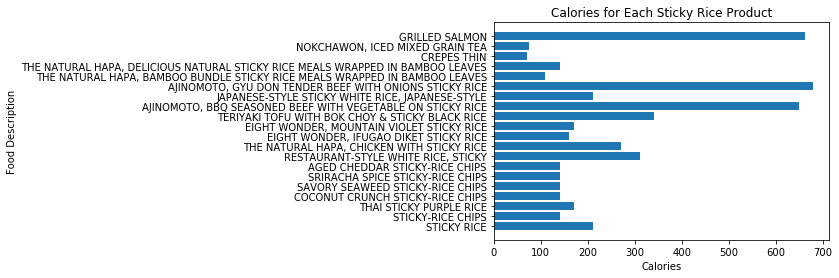

In [74]:
#Let's plot the calories on each product.
plt.barh(stickyrice_Clean4.description, stickyrice_Clean4.calories)
plt.xlabel('Calories')
plt.ylabel('Food Description')
plt.title('Calories for Each Sticky Rice Product')
plt.savefig('sr_calories.png', dpi=300, bbox_inches='tight')

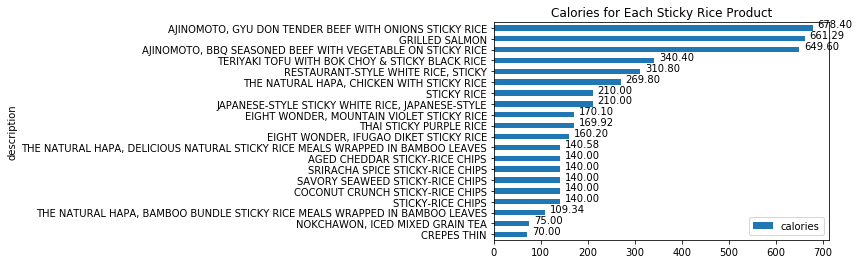

In [75]:
#Sort the plot by descending order of calories and show calorie values
ax = stickyrice_Clean4.sort_values('calories', ascending=True).plot(kind='barh', x='description', y='calories',\
                    title='Calories for Each Sticky Rice Product')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 3), textcoords='offset points')

plt.savefig('sr_calories_order.png', dpi=300, bbox_inches='tight')

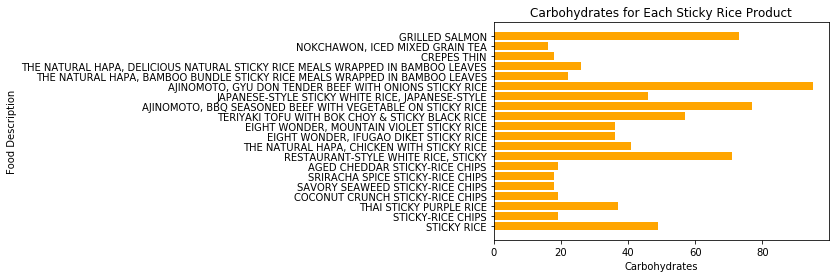

In [76]:
#Let's plot the carbohydrates on each product.
plt.barh(stickyrice_Clean4.description, stickyrice_Clean4.carbohydrates, color='orange')
plt.xlabel('Carbohydrates')
plt.ylabel('Food Description')
plt.title('Carbohydrates for Each Sticky Rice Product')
plt.savefig('sr_carb.png', dpi=300, bbox_inches='tight')

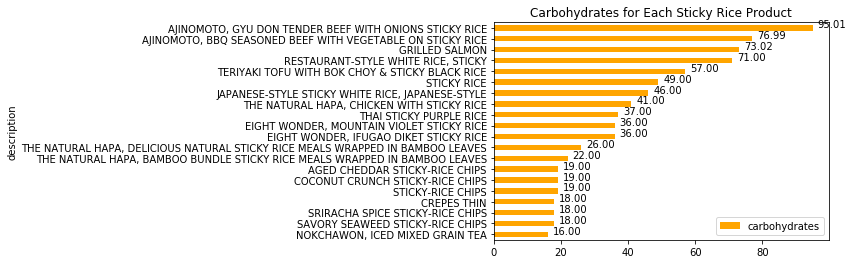

In [77]:
#Sort the plot by descending order of carbohydrates and show carbohydrate values
ax = stickyrice_Clean4.sort_values('carbohydrates', ascending=True).plot(kind='barh', x='description', y='carbohydrates',\
                    title='Carbohydrates for Each Sticky Rice Product', color='orange')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 3), textcoords='offset points')

plt.savefig('sr_carbs_order.png', dpi=300, bbox_inches='tight')

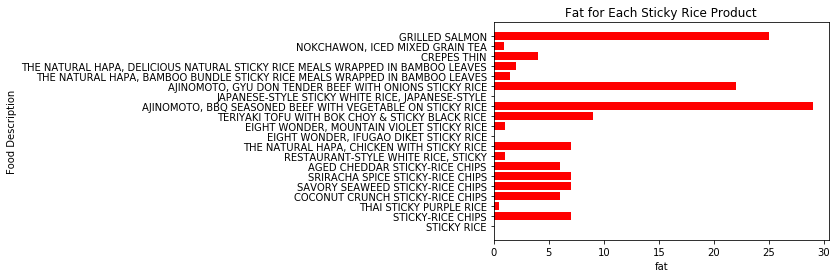

In [78]:
#Let's plot the fat on each product.
plt.barh(stickyrice_Clean4.description, stickyrice_Clean4.fat, color='red')
plt.xlabel('fat')
plt.ylabel('Food Description')
plt.title('Fat for Each Sticky Rice Product')
plt.savefig('sr_fat.png', dpi=300, bbox_inches='tight')

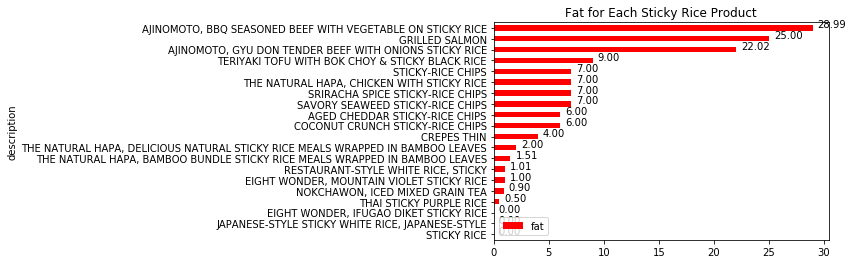

In [79]:
#Sort the plot by descending order of fat and show fat values
ax = stickyrice_Clean4.sort_values('fat', ascending=True).plot(kind='barh', x='description', y='fat',\
                    title='Fat for Each Sticky Rice Product', color='red')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 3), textcoords='offset points')

plt.savefig('sr_fat_order.png', dpi=300, bbox_inches='tight')

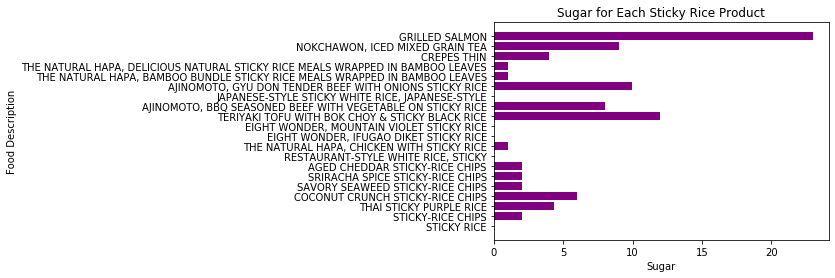

In [80]:
#Let's plot the sugars on each product.
plt.barh(stickyrice_Clean4.description, stickyrice_Clean4.sugars, color='purple')
plt.xlabel('Sugar')
plt.ylabel('Food Description')
plt.title('Sugar for Each Sticky Rice Product')
plt.savefig('sr_sugar.png', dpi=300, bbox_inches='tight')

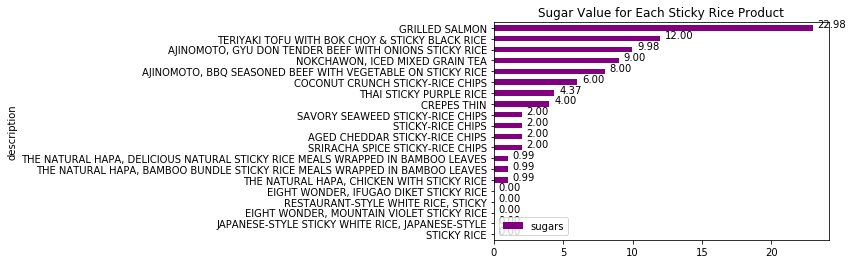

In [81]:
#Sort the plot by descending order of sugars and show sugar values
ax = stickyrice_Clean4.sort_values('sugars', ascending=True).plot(kind='barh', x='description', y='sugars',\
                    title='Sugar Value for Each Sticky Rice Product', color='purple')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 3), textcoords='offset points')

plt.savefig('sr_sugar_order.png', dpi=300, bbox_inches='tight')

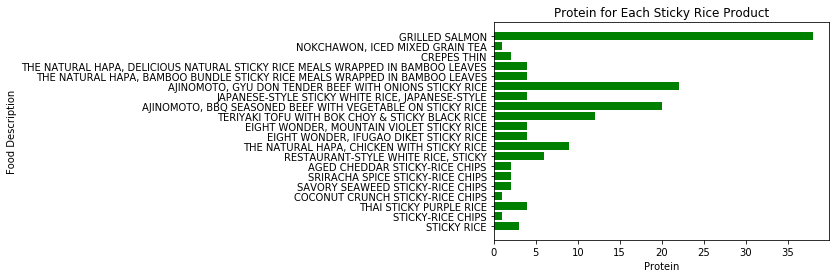

In [82]:
#Let's plot the protein on each product.
plt.barh(stickyrice_Clean4.description, stickyrice_Clean4.protein, color='green')
plt.xlabel('Protein')
plt.ylabel('Food Description')
plt.title('Protein for Each Sticky Rice Product')
plt.savefig('sr_protein.png', dpi=300, bbox_inches='tight')

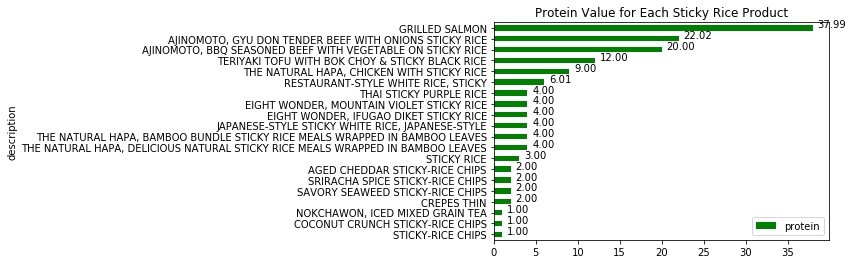

In [83]:
#Sort the plot by descending order of protein and show protein values
ax = stickyrice_Clean4.sort_values('protein', ascending=True).plot(kind='barh', x='description', y='protein',\
                    title='Protein Value for Each Sticky Rice Product', color='green')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 3), textcoords='offset points')

plt.savefig('sr_protein_order.png', dpi=300, bbox_inches='tight')

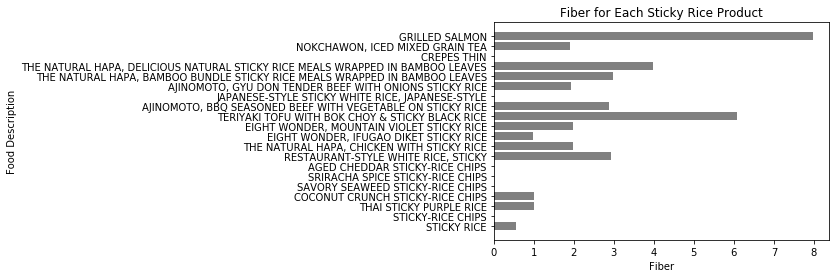

In [84]:
#Let's plot the calories on each product.
plt.barh(stickyrice_Clean4.description, stickyrice_Clean4.fiber, color='gray')
plt.xlabel('Fiber')
plt.ylabel('Food Description')
plt.title('Fiber for Each Sticky Rice Product')
plt.savefig('sr_fiber.png', dpi=300, bbox_inches='tight')

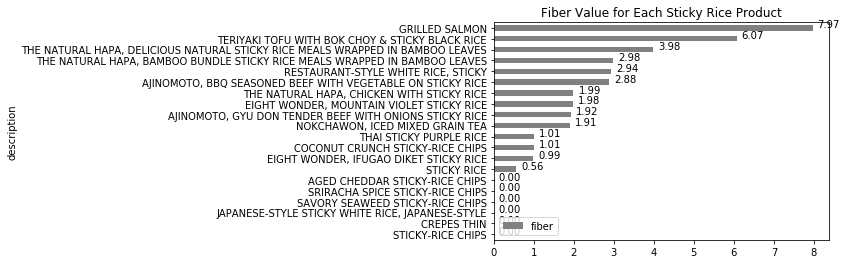

In [85]:
#Sort the plot by descending order of fiber and show fiber values
ax = stickyrice_Clean4.sort_values('fiber', ascending=True).plot(kind='barh', x='description', y='fiber',\
                    title='Fiber Value for Each Sticky Rice Product', color='gray')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 3), textcoords='offset points')

plt.savefig('sr_fiber_order.png', dpi=300, bbox_inches='tight')

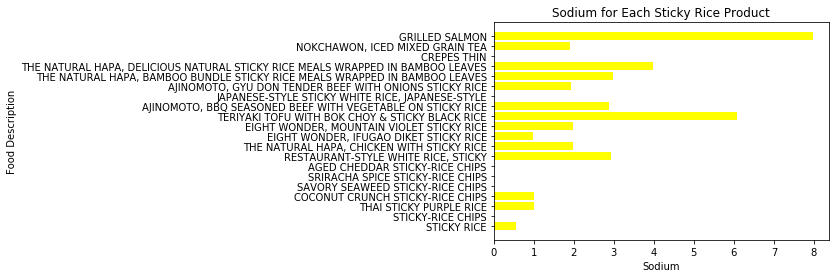

In [74]:
#Let's plot the calories on each product.
plt.barh(stickyrice_Clean4.description, stickyrice_Clean4.fiber, color='yellow')
plt.xlabel('Sodium')
plt.ylabel('Food Description')
plt.title('Sodium for Each Sticky Rice Product')
plt.savefig('sr_sodium.png', dpi=300, bbox_inches='tight')

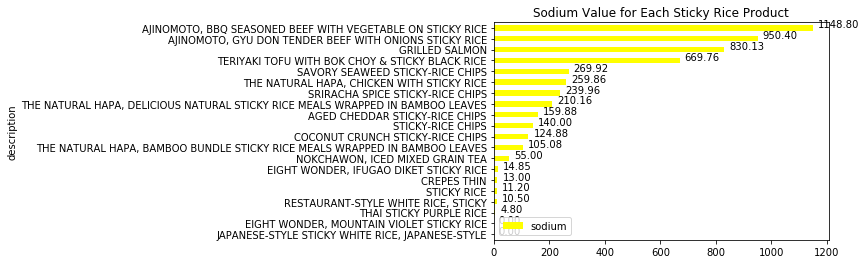

In [79]:
#Sort the plot by descending order of fiber and show fiber values
ax = stickyrice_Clean4.sort_values('sodium', ascending=True).plot(kind='barh', x='description', y='sodium',\
                    title='Sodium Value for Each Sticky Rice Product', color='yellow')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 3), textcoords='offset points')

plt.savefig('sr_sodium_order.png', dpi=300, bbox_inches='tight')

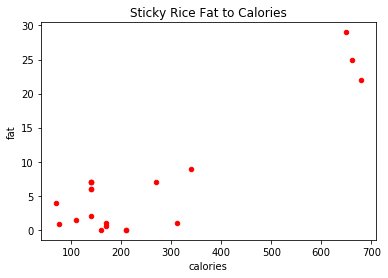

In [80]:
#Scatter plot of calories against fat
stickyrice_Clean4.plot(kind='scatter', x='calories', y='fat', color='red', title='Sticky Rice Fat to Calories')
plt.savefig('sr_fatcal.png', dpi=300, bbox_inches='tight')
plt.show()

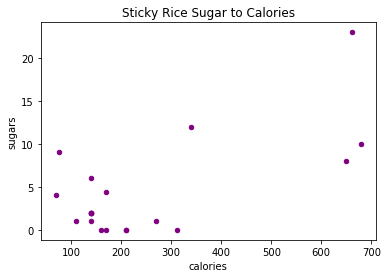

In [81]:
#Scatter plot of calories against sugars
stickyrice_Clean4.plot(kind='scatter', x='calories', y='sugars', color='purple', title='Sticky Rice Sugar to Calories')
plt.savefig('sr_sugcal.png', dpi=300, bbox_inches='tight')
plt.show()

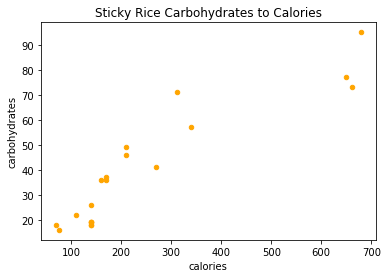

<Figure size 432x288 with 0 Axes>

In [88]:
#Scatter plot of calories against carbohydrates
stickyrice_Clean4.plot(kind='scatter', x='calories', y='carbohydrates', color='orange', title='Sticky Rice Carbohydrates to Calories')
plt.show()
plt.savefig('sr_carbs.png', dpi=300, bbox_inches='tight')

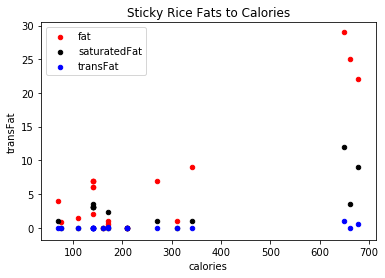

In [89]:
#Look to see if there is a pattern between fat, saturateFat, and transFat in calories
ax = stickyrice_Clean4.plot(kind='scatter', x='calories', y='fat', color='red', label='fat', title='Sticky Rice Fats to Calories')
stickyrice_Clean4.plot(kind='scatter', x='calories', y='saturatedFat', color='black', label='saturatedFat', ax=ax)
stickyrice_Clean4.plot(kind='scatter', x='calories', y='transFat', color='blue', label='transFat', ax=ax)
plt.savefig('sr_fats.png', dpi=300, bbox_inches='tight')

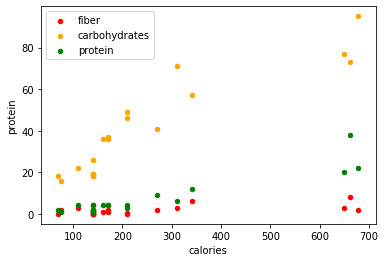

In [90]:
#Look at fiber, carbohydrates, and protin against calories
ax = stickyrice_Clean4.plot(kind='scatter', x='calories', y='fiber', color='red', label='fiber')
stickyrice_Clean4.plot(kind='scatter', x='calories', y='carbohydrates', color='orange', label='carbohydrates', ax=ax)
stickyrice_Clean4.plot(kind='scatter', x='calories', y='protein', color='green', label='protein', ax=ax)
plt.savefig('sr_fibcarpro.png', dpi=300, bbox_inches='tight')

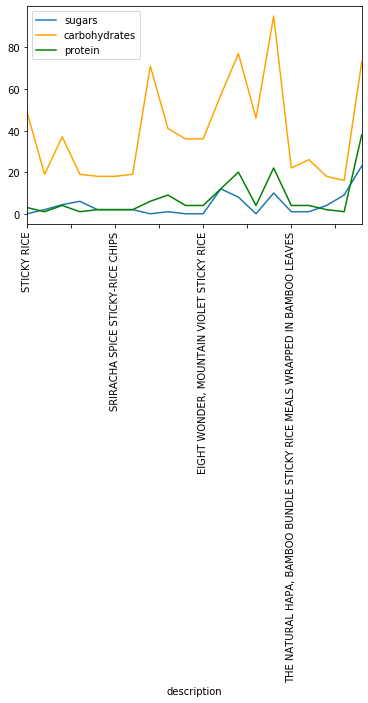

<Figure size 432x288 with 0 Axes>

In [91]:
#Use this to compare values for sugars, carbohydrates, protein
ax = plt.gca()

stickyrice_Clean4.plot(kind='line', rot='vertical', x='description', y='sugars', ax=ax)
stickyrice_Clean4.plot(kind='line', rot='vertical', x='description', y='carbohydrates', color='orange', ax=ax)
stickyrice_Clean4.plot(kind='line', rot='vertical', x='description', y='protein', color='green', ax=ax)
plt.show()
plt.savefig('sr_sugcarpro.png', dpi=300, bbox_inches='tight')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


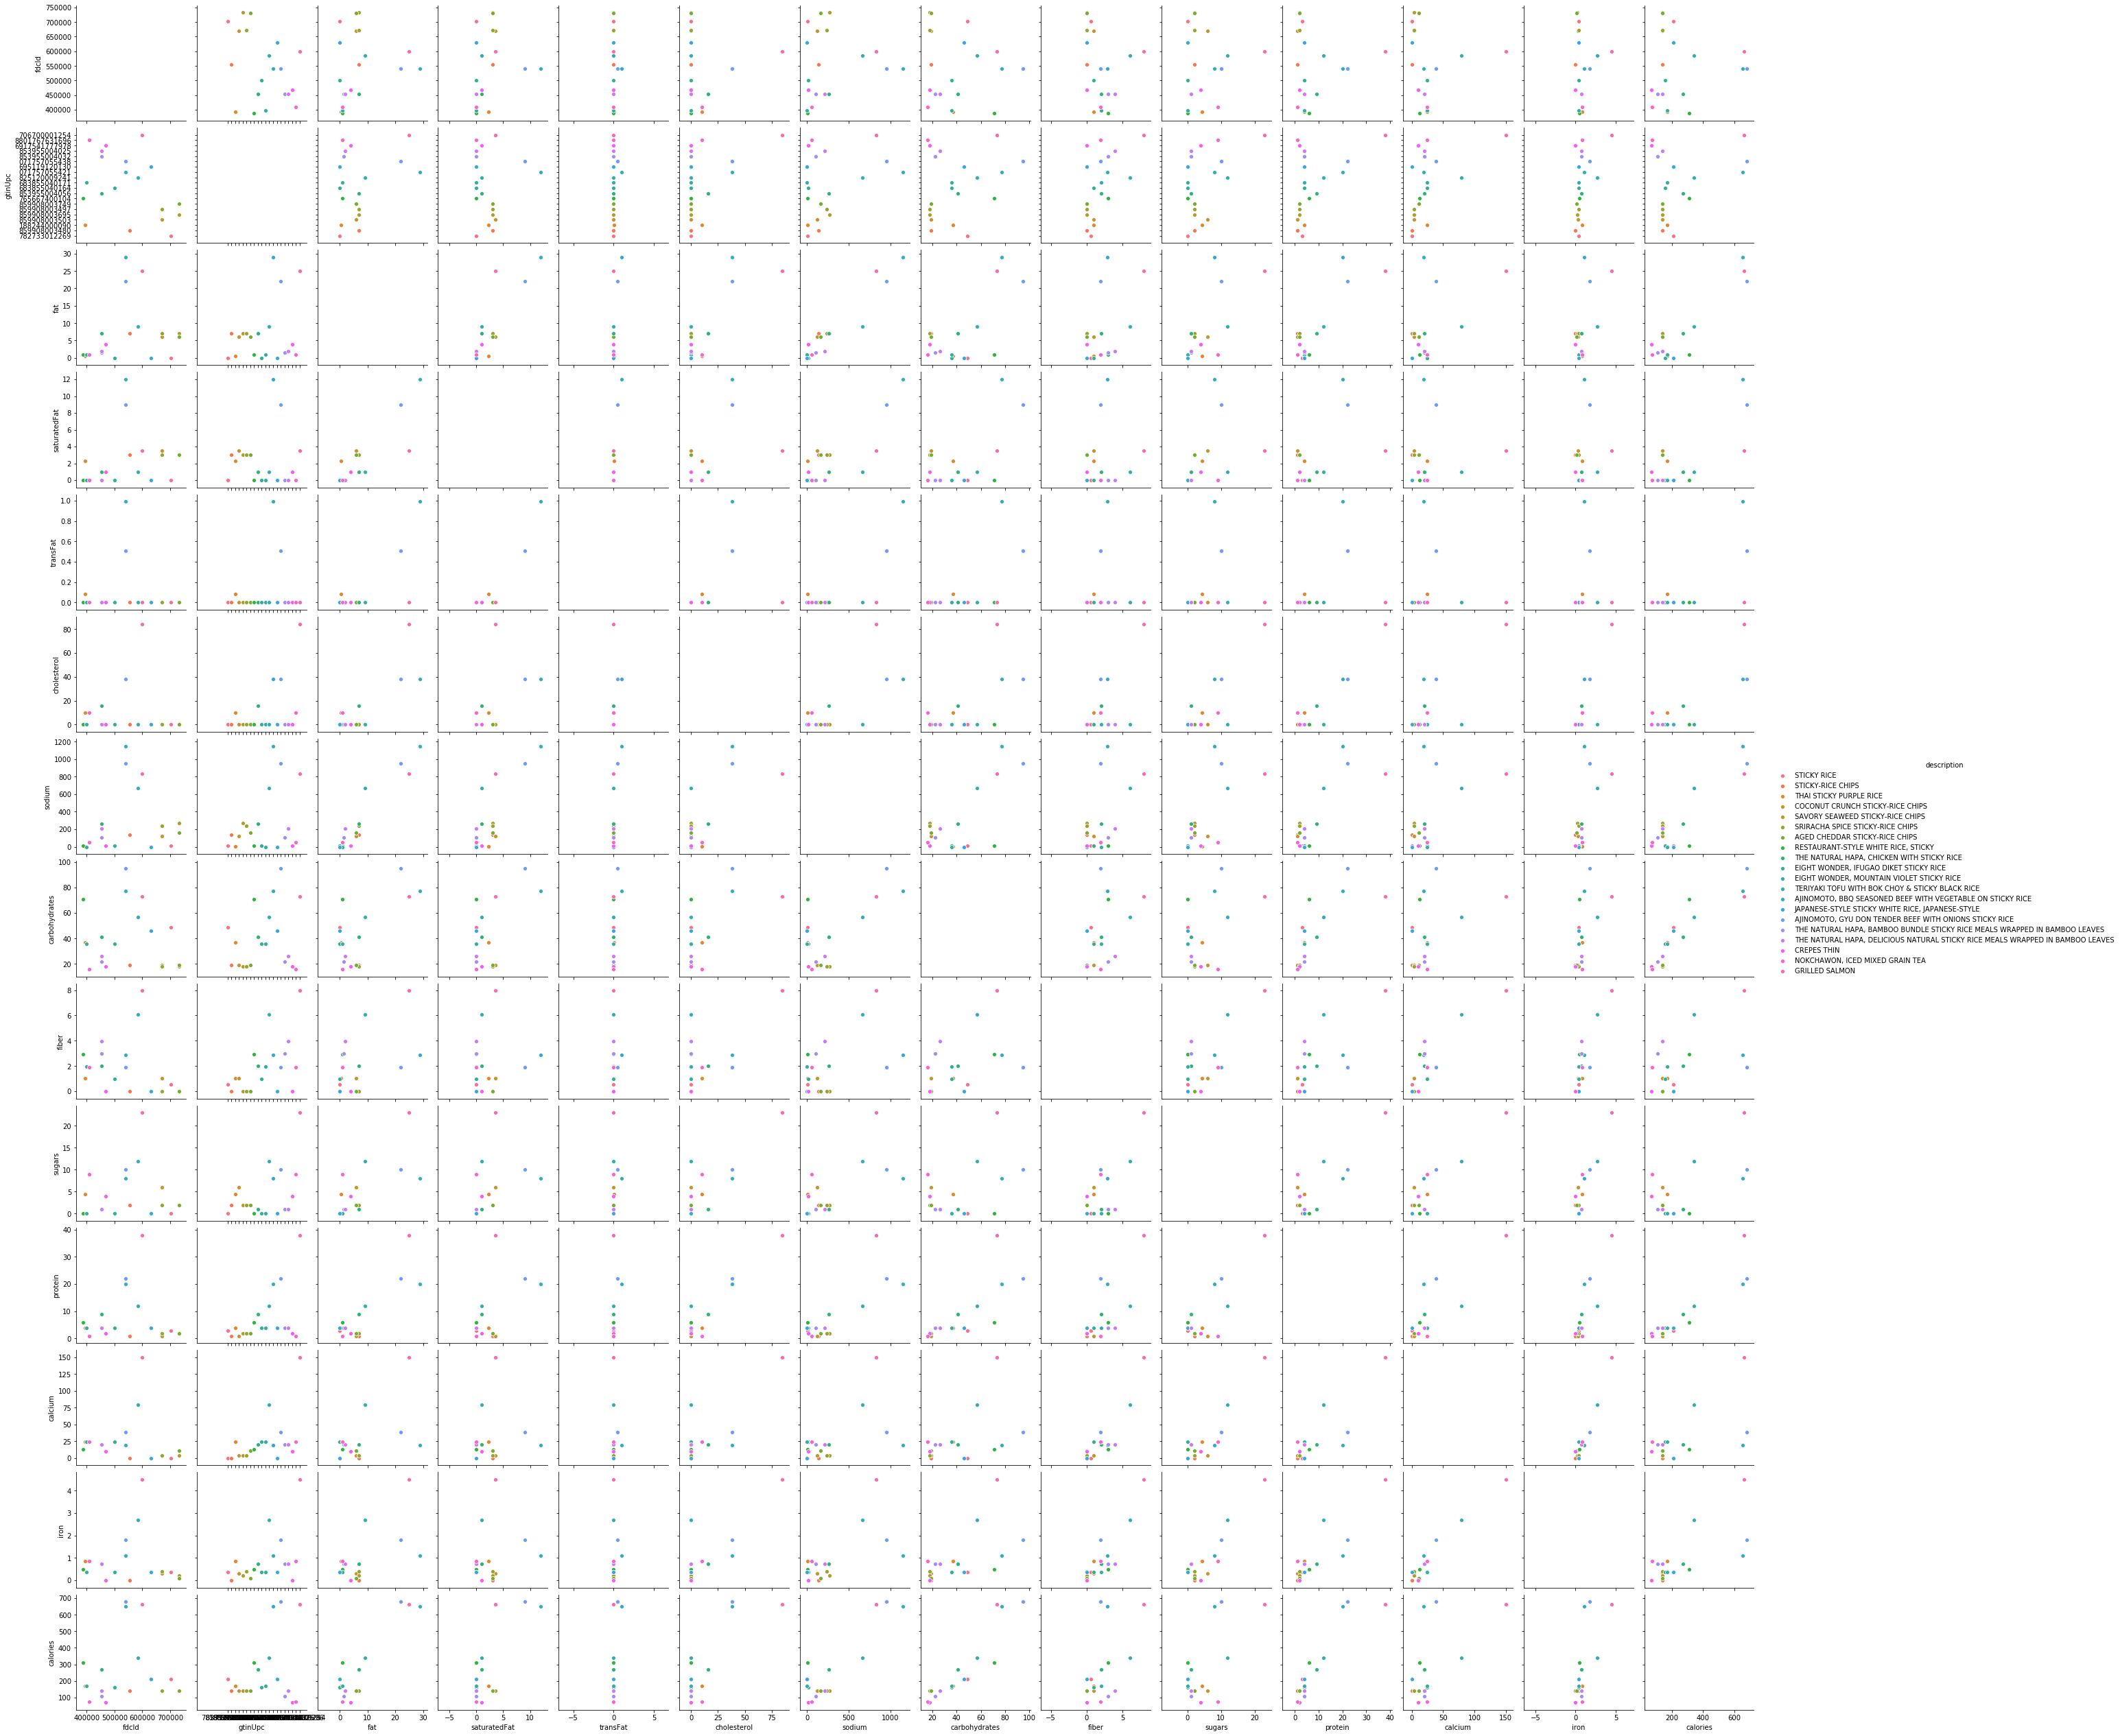

In [92]:
#Only run if needed, takes a long time! Plot is too large for any value!!!
#Let's take a look at a pair plot
sns.pairplot(data=stickyrice_Clean4, hue='description')

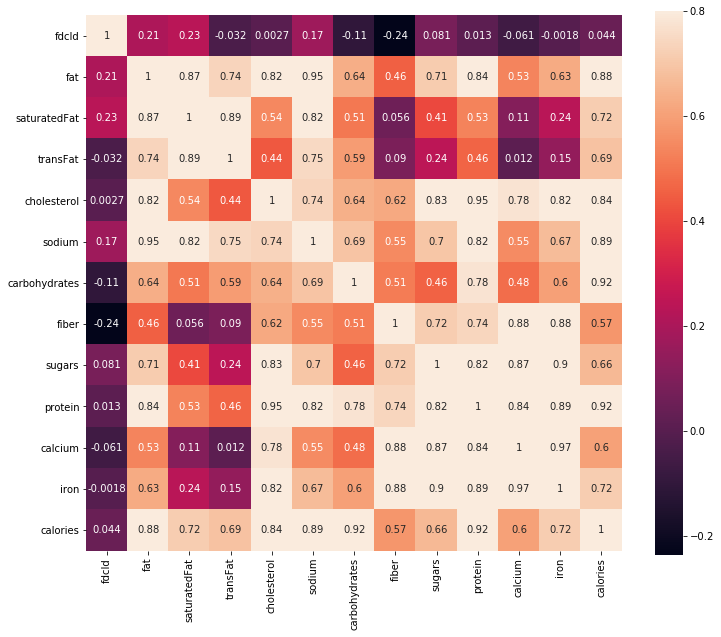

In [93]:
#Let's try a correlation matrix instead...
corrmat = stickyrice_Clean4.corr()
f, ax = plt.subplots(figsize=(12,10)) #setting some parameters of the plot to help readability
sns.heatmap(corrmat, vmax = .8, square=True, annot=True)
plt.savefig('sr_corr.png', dpi=300, bbox_inches='tight')

### Attempt at building a decision tree:

In [133]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [134]:
def unique_vals(rows, col): 
    """Find the unique values for a column in a dataset.""" 
    return set([row[col] for row in rows]) 

In [135]:
#Run above function to find unique values in each row for each column in stickyrice data frame
unique_vals(stickyrice_Clean4, 0)
unique_vals(stickyrice_Clean4, 1)
unique_vals(stickyrice_Clean4, 2)
#unique_vals(stickyrice_Clean4, 3-19) does not work "IndexError: string index out of range".
#Therefore, unable to check for unique values in columns 3-19

{'a', 'b', 'c', 'd', 'g', 'i', 'l', 'o', 'r', 's', 't'}

In [136]:
def class_counts(rows): 
    """Counts the number of each type of example in a dataset.""" 
    counts = {}  # a dictionary of label -> count. 
    for row in rows: 
         # in our dataset format, the label is always the last column 
        label = row[-1] 
        if label not in counts: 
            counts[label] = 0 
        counts[label] += 1 
    return counts 

In [137]:
#Run above function to get number of each type of example
class_counts(stickyrice_Clean4)

{'d': 2, 'n': 3, 'e': 1, 'c': 1, 'r': 2, 's': 4, 't': 3, 'l': 1, 'm': 2}

In [138]:
def is_numeric(value): 
    """Test if a value is numeric.""" 
    return isinstance(value, int) or isinstance(value, float) 

In [139]:
#Check if value is numeric
is_numeric("STICKY RICE") 

False

In [140]:
is_numeric(7)

True

In [141]:
features = stickyrice_Clean4[["calories", "fat", "carbohydrates", "sugars", "protein", "fiber", "sodium", "cholesterol"]]
target = stickyrice_Clean4["description"]

In [142]:
target

0                                           STICKY RICE
1                                     STICKY-RICE CHIPS
2                               THAI STICKY PURPLE RICE
3                      COCONUT CRUNCH STICKY-RICE CHIPS
4                      SAVORY SEAWEED STICKY-RICE CHIPS
5                      SRIRACHA SPICE STICKY-RICE CHIPS
6                        AGED CHEDDAR STICKY-RICE CHIPS
7                   RESTAURANT-STYLE WHITE RICE, STICKY
8            THE NATURAL HAPA, CHICKEN WITH STICKY RICE
9                EIGHT WONDER, IFUGAO DIKET STICKY RICE
10            EIGHT WONDER, MOUNTAIN VIOLET STICKY RICE
11      TERIYAKI TOFU WITH BOK CHOY & STICKY BLACK RICE
12    AJINOMOTO, BBQ SEASONED BEEF WITH VEGETABLE ON...
13     JAPANESE-STYLE STICKY WHITE RICE, JAPANESE-STYLE
14    AJINOMOTO, GYU DON TENDER BEEF WITH ONIONS STI...
15    THE NATURAL HAPA, BAMBOO BUNDLE STICKY RICE ME...
16    THE NATURAL HAPA, DELICIOUS NATURAL STICKY RIC...
17                                          CREP

In [143]:
features

calories    fat  carbohydrates  sugars  protein  fiber   sodium  \
0     210.00   0.00          49.00    0.00     3.00   0.56    11.20   
1     140.00   7.00          19.00    2.00     1.00   0.00   140.00   
2     169.92   0.50          37.00    4.37     4.00   1.01     4.80   
3     140.00   6.00          19.00    6.00     1.00   1.01   124.88   
4     140.00   7.00          18.00    2.00     2.00   0.00   269.92   
5     140.00   7.00          18.00    2.00     2.00   0.00   239.96   
6     140.00   6.00          19.00    2.00     2.00   0.00   159.88   
7     310.80   1.01          71.00    0.00     6.01   2.94    10.50   
8     269.80   7.00          41.00    0.99     9.00   1.99   259.86   
9     160.20   0.00          36.00    0.00     4.00   0.99    14.85   
10    170.10   1.00          36.00    0.00     4.00   1.98     0.00   
11    340.40   9.00          57.00   12.00    12.00   6.07   669.76   
12    649.60  28.99          76.99    8.00    20.00   2.88  1148.80   
13    210.00   0.00          46.00    0.00     4.00   0.00     0.00   
14    678.40  22.02          95.01    9.98    22.02   1.92   950.40   
15    109.34   1.51          22.00    0.99     4.00   2.98   105.08   
16    140.58   2.00          26.00    0.99     4.00   3.98   210.16   
17     70.00   4.00          18.00    4.00     2.00   0.00    13.00   
18     75.00   0.90          16.00    9.00     1.00   1.91    55.00   
19    661.29  25.00          73.02   22.98    37.99   7.97   830.13   

    cholesterol  
0          0.00  
1          0.00  
2          9.82  
3          0.00  
4          0.00  
5          0.00  
6          0.00  
7          0.00  
8         15.62  
9          0.00  
10         0.00  
11         0.00  
12        38.40  
13         0.00  
14        38.40  
15         0.00  
16         0.00  
17         0.00  
18         9.82  
19        84.42

In [145]:
def gini(rows): 
    """Calculate the Gini Impurity for a list of rows. 
  
    There are a few different ways to do this, I thought this one was 
    the most concise. See: 
    https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity 
    """ 
    counts = class_counts(rows) 
    impurity = 1 
    for lbl in counts: 
        prob_of_lbl = counts[lbl] / float(len(rows)) 
        impurity -= prob_of_lbl**2 
    return impurity 

### Run a number of gini test on each column. Any value close to 1 indicates high impurity. Any value closer to 0 means more pure data.

In [146]:
gini('description')

0.8925619834710746

In [147]:
gini('calories')

0.875

In [148]:
gini('fdcId')

0.7199999999999999

In [149]:
gini('dataType')

0.84375

In [150]:
gini('brandOwner')

0.8599999999999999

In [151]:
gini('gtinUpc')

0.857142857142857

In [152]:
def info_gain(left, right, current_uncertainty): 
    """Information Gain. 
  
    The uncertainty of the starting node, minus the weighted impurity of 
    two child nodes. 
    """ 
    p = float(len(left)) / (len(left) + len(right)) 
    return current_uncertainty - p * gini(left) - (1 - p) * gini(right) 

In [153]:
current_uncertainty = gini(stickyrice_Clean4)
current_uncertainty

0.8775000000000002

## I am unable to move forward with a decision tree because the gini value of the data frame is so high. It shows 0.8775 which is close to 1, indicating the high impurity values of the stickyrice dataframe!
<br>
To move on, let's conduct the same search for <u>whole wheat bread</u> to see what is found. This will at least give us some material to collect for comparison and contrasting the two food products against one another. We can later check the current uncertainty and gin value of the whole wheat data frame as well.

In [85]:
params = {'api_key': MY_API_KEY}
bread = {'generalSearchInput': '100%+whole+wheat+bread', "includeDataTypeList":["Branded"], "brandOwner":"Kroger", "requireAllWords":"true"}
response = requests.post(
    r'https://api.nal.usda.gov/fdc/v1/search',
    params=params,
    json=bread
)
print(response.json())

{'foodSearchCriteria': {'includeDataTypeList': ['Branded'], 'generalSearchInput': '100%+whole+wheat+bread', 'brandOwner': 'Kroger', 'pageNumber': 1, 'requireAllWords': True}, 'totalHits': 5, 'currentPage': 1, 'totalPages': 1, 'foods': [{'fdcId': 552018, 'description': '100% WHOLE WHEAT BREAD', 'dataType': 'Branded', 'gtinUpc': '011110009814', 'publishedDate': '2019-04-01', 'brandOwner': 'The Kroger Co.', 'ingredients': 'WHOLE WHEAT FLOUR, WATER, WHEAT GLUTEN, RESISTANT CORN STARCH, MALTITOL, YEAST. CONTAINS 2% OR LESS OF: WHEAT BRAN, SOYBEAN OIL, SALT, RAISIN JUICE CONCENTRATE*, SOY FLOUR, SODIUM STEAROYL LACTYLATE, CALCIUM PROPIONATE (PRESERVATIVE), GUAR GUM, ASCORBIC ACID, ENZYMES, SUCRALOSE.', 'allHighlightFields': '<b>Brand Owner</b>: The <em>Kroger</em> Co.<br/><b>Ingredients</b>: <em>WHOLE</em> <em>WHEAT</em> FLOUR, WATER, <em>WHEAT</em> GLUTEN, RESISTANT CORN STARCH, MALTITOL, YEAST. CONTAINS 2% OR LESS', 'score': 136.06213}, {'fdcId': 519469, 'description': '100% WHOLE WHEAT BR

In [86]:
#Convert above JSON output into more readable format

# JSON to dictionary
datatypes_dict = json.loads(response.text)

# need the keys from this dictionary
datatypes_dict.keys()

dict_keys(['foodSearchCriteria', 'totalHits', 'currentPage', 'totalPages', 'foods'])

In [87]:
#Look at first few results
datatypes_dict['foods'][:5]

[{'fdcId': 552018,
  'description': '100% WHOLE WHEAT BREAD',
  'dataType': 'Branded',
  'gtinUpc': '011110009814',
  'publishedDate': '2019-04-01',
  'brandOwner': 'The Kroger Co.',
  'ingredients': 'WHOLE WHEAT FLOUR, WATER, WHEAT GLUTEN, RESISTANT CORN STARCH, MALTITOL, YEAST. CONTAINS 2% OR LESS OF: WHEAT BRAN, SOYBEAN OIL, SALT, RAISIN JUICE CONCENTRATE*, SOY FLOUR, SODIUM STEAROYL LACTYLATE, CALCIUM PROPIONATE (PRESERVATIVE), GUAR GUM, ASCORBIC ACID, ENZYMES, SUCRALOSE.',
  'allHighlightFields': '<b>Brand Owner</b>: The <em>Kroger</em> Co.<br/><b>Ingredients</b>: <em>WHOLE</em> <em>WHEAT</em> FLOUR, WATER, <em>WHEAT</em> GLUTEN, RESISTANT CORN STARCH, MALTITOL, YEAST. CONTAINS 2% OR LESS',
  'score': 136.06213},
 {'fdcId': 519469,
  'description': '100% WHOLE WHEAT BREAD',
  'dataType': 'Branded',
  'gtinUpc': '011110008411',
  'publishedDate': '2019-04-01',
  'brandOwner': 'The Kroger Co.',
  'ingredients': 'ORGANIC WHOLE WHEAT FLOUR, FILTERED WATER, ORGANIC CRACKED WHEAT, ORGAN

In [88]:
#Let's just look at the first food
wwbreads = datatypes_dict['foods']
wwbreads[0]

{'fdcId': 552018,
 'description': '100% WHOLE WHEAT BREAD',
 'dataType': 'Branded',
 'gtinUpc': '011110009814',
 'publishedDate': '2019-04-01',
 'brandOwner': 'The Kroger Co.',
 'ingredients': 'WHOLE WHEAT FLOUR, WATER, WHEAT GLUTEN, RESISTANT CORN STARCH, MALTITOL, YEAST. CONTAINS 2% OR LESS OF: WHEAT BRAN, SOYBEAN OIL, SALT, RAISIN JUICE CONCENTRATE*, SOY FLOUR, SODIUM STEAROYL LACTYLATE, CALCIUM PROPIONATE (PRESERVATIVE), GUAR GUM, ASCORBIC ACID, ENZYMES, SUCRALOSE.',
 'allHighlightFields': '<b>Brand Owner</b>: The <em>Kroger</em> Co.<br/><b>Ingredients</b>: <em>WHOLE</em> <em>WHEAT</em> FLOUR, WATER, <em>WHEAT</em> GLUTEN, RESISTANT CORN STARCH, MALTITOL, YEAST. CONTAINS 2% OR LESS',
 'score': 136.06213}

In [89]:
for bread in wwbreads:
    print(f"{bread['fdcId']}:     {bread['description']}, {bread['dataType']}")

552018:     100% WHOLE WHEAT BREAD, Branded
519469:     100% WHOLE WHEAT BREAD, Branded
537488:     HONEY 100% WHOLE WHEAT BREAD, Branded
438845:     SIMPLE TRUTH ORGANIC, 100% WHOLE WHEAT BREAD, Branded
408650:     PRIVATE SELECTION, 100% WHOLE WHEAT WIDE PAN BREAD, Branded


In [90]:
wwbread_df = pd.DataFrame(wwbreads)

In [91]:
wwbread_df.head()

fdcId                                        description dataType  \
0  552018                             100% WHOLE WHEAT BREAD  Branded   
1  519469                             100% WHOLE WHEAT BREAD  Branded   
2  537488                       HONEY 100% WHOLE WHEAT BREAD  Branded   
3  438845       SIMPLE TRUTH ORGANIC, 100% WHOLE WHEAT BREAD  Branded   
4  408650  PRIVATE SELECTION, 100% WHOLE WHEAT WIDE PAN B...  Branded   

        gtinUpc publishedDate      brandOwner  \
0  011110009814    2019-04-01  The Kroger Co.   
1  011110008411    2019-04-01  The Kroger Co.   
2  011110009821    2019-04-01  The Kroger Co.   
3  011110870179    2019-04-01  The Kroger Co.   
4  011110001979    2019-04-01  The Kroger Co.   

                                         ingredients  \
0  WHOLE WHEAT FLOUR, WATER, WHEAT GLUTEN, RESIST...   
1  ORGANIC WHOLE WHEAT FLOUR, FILTERED WATER, ORG...   
2  ORGANIC WHOLE WHEAT FLOUR, WATER, ORGANIC VITA...   
3  ORGANIC WHOLE WHEAT FLOUR, FILTERED WATER, ORG...   
4  WHOLE WHEAT FLOUR, WATER, SUGAR, VITAL WHEAT G...   

                                  allHighlightFields       score  
0  <b>Brand Owner</b>: The <em>Kroger</em> Co.<br...  136.062130  
1  <b>Brand Owner</b>: The <em>Kroger</em> Co.<br...  136.062130  
2  <b>Brand Owner</b>: The <em>Kroger</em> Co.<br...   60.652420  
3  <b>Brand Owner</b>: The <em>Kroger</em> Co.<br...  -57.213173  
4  <b>Brand Owner</b>: The <em>Kroger</em> Co.<br... -104.143326

In [92]:
wwbread_df.tail()

fdcId                                        description dataType  \
0  552018                             100% WHOLE WHEAT BREAD  Branded   
1  519469                             100% WHOLE WHEAT BREAD  Branded   
2  537488                       HONEY 100% WHOLE WHEAT BREAD  Branded   
3  438845       SIMPLE TRUTH ORGANIC, 100% WHOLE WHEAT BREAD  Branded   
4  408650  PRIVATE SELECTION, 100% WHOLE WHEAT WIDE PAN B...  Branded   

        gtinUpc publishedDate      brandOwner  \
0  011110009814    2019-04-01  The Kroger Co.   
1  011110008411    2019-04-01  The Kroger Co.   
2  011110009821    2019-04-01  The Kroger Co.   
3  011110870179    2019-04-01  The Kroger Co.   
4  011110001979    2019-04-01  The Kroger Co.   

                                         ingredients  \
0  WHOLE WHEAT FLOUR, WATER, WHEAT GLUTEN, RESIST...   
1  ORGANIC WHOLE WHEAT FLOUR, FILTERED WATER, ORG...   
2  ORGANIC WHOLE WHEAT FLOUR, WATER, ORGANIC VITA...   
3  ORGANIC WHOLE WHEAT FLOUR, FILTERED WATER, ORG...   
4  WHOLE WHEAT FLOUR, WATER, SUGAR, VITAL WHEAT G...   

                                  allHighlightFields       score  
0  <b>Brand Owner</b>: The <em>Kroger</em> Co.<br...  136.062130  
1  <b>Brand Owner</b>: The <em>Kroger</em> Co.<br...  136.062130  
2  <b>Brand Owner</b>: The <em>Kroger</em> Co.<br...   60.652420  
3  <b>Brand Owner</b>: The <em>Kroger</em> Co.<br...  -57.213173  
4  <b>Brand Owner</b>: The <em>Kroger</em> Co.<br... -104.143326

In [93]:
#Look at data frame info and data types
wwbread_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
fdcId                 5 non-null int64
description           5 non-null object
dataType              5 non-null object
gtinUpc               5 non-null object
publishedDate         5 non-null object
brandOwner            5 non-null object
ingredients           5 non-null object
allHighlightFields    5 non-null object
score                 5 non-null float64
dtypes: float64(1), int64(1), object(7)
memory usage: 488.0+ bytes


In [94]:
#Let's look at how many nulls are missing in each column.
num_rows = wwbread_df.shape[0]
nulls = num_rows-wwbread_df.count()
print(nulls)

fdcId                 0
description           0
dataType              0
gtinUpc               0
publishedDate         0
brandOwner            0
ingredients           0
allHighlightFields    0
score                 0
dtype: int64


In [95]:
# Now let's remove irelevant columns
wwbread_dfdrop = wwbread_df.drop(['allHighlightFields'],axis=1)

In [96]:
#Let's ensure the column was dropped and look at head
wwbread_dfdrop.head()

fdcId                                        description dataType  \
0  552018                             100% WHOLE WHEAT BREAD  Branded   
1  519469                             100% WHOLE WHEAT BREAD  Branded   
2  537488                       HONEY 100% WHOLE WHEAT BREAD  Branded   
3  438845       SIMPLE TRUTH ORGANIC, 100% WHOLE WHEAT BREAD  Branded   
4  408650  PRIVATE SELECTION, 100% WHOLE WHEAT WIDE PAN B...  Branded   

        gtinUpc publishedDate      brandOwner  \
0  011110009814    2019-04-01  The Kroger Co.   
1  011110008411    2019-04-01  The Kroger Co.   
2  011110009821    2019-04-01  The Kroger Co.   
3  011110870179    2019-04-01  The Kroger Co.   
4  011110001979    2019-04-01  The Kroger Co.   

                                         ingredients       score  
0  WHOLE WHEAT FLOUR, WATER, WHEAT GLUTEN, RESIST...  136.062130  
1  ORGANIC WHOLE WHEAT FLOUR, FILTERED WATER, ORG...  136.062130  
2  ORGANIC WHOLE WHEAT FLOUR, WATER, ORGANIC VITA...   60.652420  
3  ORGANIC WHOLE WHEAT FLOUR, FILTERED WATER, ORG...  -57.213173  
4  WHOLE WHEAT FLOUR, WATER, SUGAR, VITAL WHEAT G... -104.143326

### EDA for a list of 100% Whole Wheat Bread types and their nutrient label data:

First we need to conduct a nutrient label search for all five <u>100% Whole Wheat Bread</u> items that returned from the Food Search endpoint. 

In [97]:
#Create a variable to collect all 5 whole wheat bread fdcId's:
FDC_ID = []

for f in wwbread_df['fdcId'].iteritems():
    #print('---------')
    #for id in fdcId:
    print(f)

(0, 552018)
(1, 519469)
(2, 537488)
(3, 438845)
(4, 408650)


In [98]:
# Take the fdcId's and make it into a list.
FDC_ID = wwbread_df['fdcId'].tolist()

In [99]:
# Look at fdcId's in the FDC_ID container: 
FDC_ID

[552018, 519469, 537488, 438845, 408650]

In [100]:
# Now, let's run the Food Detail endpoint to obtain all the nutrient values for each FDC_ID:
responses = []

for f in FDC_ID:
    base = 'https://api.nal.usda.gov/fdc/v1/'
    response = requests.get(base+format(f),params=params)
    
    if response.status_code == 200:
        responses.append(response.json())
    else: 
        print("Request to {} failed".format(f))

In [101]:
#Print the responses list
print(responses)

[{'foodClass': 'Branded', 'description': '100% WHOLE WHEAT BREAD', 'foodNutrients': [{'type': 'FoodNutrient', 'id': 3756585, 'nutrient': {'id': 1110, 'number': '324', 'name': 'Vitamin D (D2 + D3), International Units', 'rank': 8650, 'unitName': 'IU'}, 'foodNutrientDerivation': {'id': 75, 'code': 'LCCD', 'description': 'Calculated from a daily value percentage per serving size measure', 'foodNutrientSource': {'id': 9, 'code': '12', 'description': "Manufacturer's analytical; partial documentation"}}, 'amount': 0.0}, {'type': 'FoodNutrient', 'id': 3756586, 'nutrient': {'id': 1253, 'number': '601', 'name': 'Cholesterol', 'rank': 15700, 'unitName': 'mg'}, 'foodNutrientDerivation': {'id': 75, 'code': 'LCCD', 'description': 'Calculated from a daily value percentage per serving size measure', 'foodNutrientSource': {'id': 9, 'code': '12', 'description': "Manufacturer's analytical; partial documentation"}}, 'amount': 0.0}, {'type': 'FoodNutrient', 'id': 3756587, 'nutrient': {'id': 1258, 'number'

In [103]:
# Create a dictionary of only the fdcId and the Nutrient label data:
nutri_dict = {d['fdcId']: d['labelNutrients'] for d in responses}

In [104]:
# Look at data output:
nutri_dict

{552018: {'fat': {'value': 1.4985},
  'saturatedFat': {'value': 0.0},
  'transFat': {'value': 0.0},
  'cholesterol': {'value': 0.0},
  'sodium': {'value': 189.9},
  'carbohydrates': {'value': 19.998},
  'fiber': {'value': 4.005},
  'sugars': {'value': 0.0},
  'protein': {'value': 4.9995},
  'calcium': {'value': 149.85},
  'iron': {'value': 3.0015},
  'potassium': {'value': 90.0},
  'calories': {'value': 99.9}},
 519469: {'fat': {'value': 1.5007},
  'saturatedFat': {'value': 0.0},
  'transFat': {'value': 0.0},
  'cholesterol': {'value': 0.0},
  'sodium': {'value': 140.18},
  'carbohydrates': {'value': 19.9993},
  'fiber': {'value': 3.01},
  'sugars': {'value': 3.0014},
  'protein': {'value': 3.999},
  'calcium': {'value': 20.21},
  'iron': {'value': 1.0793},
  'calories': {'value': 100.19}},
 537488: {'fat': {'value': 1.0019},
  'saturatedFat': {'value': 0.0},
  'transFat': {'value': 0.0},
  'cholesterol': {'value': 0.0},
  'sodium': {'value': 150.07},
  'carbohydrates': {'value': 17.99

In [105]:
#create a new variable and flatten the value so we keep the key intact
new_keyvalue = dict([(key, flatten(value)) for key, value in nutri_dict.items()])

In [106]:
#Let's look at the new_keyvalue dictionary now
new_keyvalue

{552018: OrderedDict([('fat_value', 1.4985),
              ('saturatedFat_value', 0.0),
              ('transFat_value', 0.0),
              ('cholesterol_value', 0.0),
              ('sodium_value', 189.9),
              ('carbohydrates_value', 19.998),
              ('fiber_value', 4.005),
              ('sugars_value', 0.0),
              ('protein_value', 4.9995),
              ('calcium_value', 149.85),
              ('iron_value', 3.0015),
              ('potassium_value', 90.0),
              ('calories_value', 99.9)]),
 519469: OrderedDict([('fat_value', 1.5007),
              ('saturatedFat_value', 0.0),
              ('transFat_value', 0.0),
              ('cholesterol_value', 0.0),
              ('sodium_value', 140.18),
              ('carbohydrates_value', 19.9993),
              ('fiber_value', 3.01),
              ('sugars_value', 3.0014),
              ('protein_value', 3.999),
              ('calcium_value', 20.21),
              ('iron_value', 1.0793),
              (

### Great this is the information I need from the nutrient label!

In [107]:
# Put the dictionary into a dataframe and set the fdcID as the index
nutri_df = pd.DataFrame.from_dict(new_keyvalue, orient = 'index')

In [108]:
#Look at the head again
nutri_df.head()

fat_value  saturatedFat_value  transFat_value  cholesterol_value  \
552018     1.4985              0.0000             0.0                0.0   
519469     1.5007              0.0000             0.0                0.0   
537488     1.0019              0.0000             0.0                0.0   
438845     1.5007              0.0000             0.0                0.0   
408650     1.4985              0.4995             0.0                0.0   

        sodium_value  carbohydrates_value  fiber_value  sugars_value  \
552018        189.90              19.9980        4.005        0.0000   
519469        140.18              19.9993        3.010        3.0014   
537488        150.07              17.9998        4.515        1.9995   
438845        140.18              19.9993        3.010        3.0014   
408650        260.10              22.9995        3.015        3.0015   

        protein_value  calcium_value  iron_value  potassium_value  \
552018         4.9995         149.85      3.0015             90.0   
519469         3.9990          20.21      1.0793              NaN   
537488         5.0009           9.89      1.0019              NaN   
438845         3.9990          20.21      1.0793              NaN   
408650         4.9995          40.05      1.0800              NaN   

        calories_value  addedSugar_value  
552018           99.90               NaN  
519469          100.19               NaN  
537488           89.87             2.021  
438845          100.19               NaN  
408650          120.15               NaN

In [109]:
# Rename the index column to fdcId
nutri_df.index.name = 'fdcId'

In [110]:
# Reset the index back to a number count
nutri_df.reset_index()

fdcId  fat_value  saturatedFat_value  transFat_value  cholesterol_value  \
0  552018     1.4985              0.0000             0.0                0.0   
1  519469     1.5007              0.0000             0.0                0.0   
2  537488     1.0019              0.0000             0.0                0.0   
3  438845     1.5007              0.0000             0.0                0.0   
4  408650     1.4985              0.4995             0.0                0.0   

   sodium_value  carbohydrates_value  fiber_value  sugars_value  \
0        189.90              19.9980        4.005        0.0000   
1        140.18              19.9993        3.010        3.0014   
2        150.07              17.9998        4.515        1.9995   
3        140.18              19.9993        3.010        3.0014   
4        260.10              22.9995        3.015        3.0015   

   protein_value  calcium_value  iron_value  potassium_value  calories_value  \
0         4.9995         149.85      3.0015             90.0           99.90   
1         3.9990          20.21      1.0793              NaN          100.19   
2         5.0009           9.89      1.0019              NaN           89.87   
3         3.9990          20.21      1.0793              NaN          100.19   
4         4.9995          40.05      1.0800              NaN          120.15   

   addedSugar_value  
0               NaN  
1               NaN  
2             2.021  
3               NaN  
4               NaN

In [111]:
#Look at data frame info and the data types
nutri_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 552018 to 408650
Data columns (total 14 columns):
fat_value              5 non-null float64
saturatedFat_value     5 non-null float64
transFat_value         5 non-null float64
cholesterol_value      5 non-null float64
sodium_value           5 non-null float64
carbohydrates_value    5 non-null float64
fiber_value            5 non-null float64
sugars_value           5 non-null float64
protein_value          5 non-null float64
calcium_value          5 non-null float64
iron_value             5 non-null float64
potassium_value        1 non-null float64
calories_value         5 non-null float64
addedSugar_value       1 non-null float64
dtypes: float64(14)
memory usage: 600.0 bytes


In [112]:
#Look at data frame keys
nutri_df.keys()

Index(['fat_value', 'saturatedFat_value', 'transFat_value',
       'cholesterol_value', 'sodium_value', 'carbohydrates_value',
       'fiber_value', 'sugars_value', 'protein_value', 'calcium_value',
       'iron_value', 'potassium_value', 'calories_value', 'addedSugar_value'],
      dtype='object')

In [113]:
# Merge the whole wheat bread dataframe with the nutritional dataframe
wwbread_merge = wwbread_df.merge(nutri_df, on = 'fdcId')

In [114]:
#Look at data frame head
wwbread_merge.head()

fdcId                                        description dataType  \
0  552018                             100% WHOLE WHEAT BREAD  Branded   
1  519469                             100% WHOLE WHEAT BREAD  Branded   
2  537488                       HONEY 100% WHOLE WHEAT BREAD  Branded   
3  438845       SIMPLE TRUTH ORGANIC, 100% WHOLE WHEAT BREAD  Branded   
4  408650  PRIVATE SELECTION, 100% WHOLE WHEAT WIDE PAN B...  Branded   

        gtinUpc publishedDate      brandOwner  \
0  011110009814    2019-04-01  The Kroger Co.   
1  011110008411    2019-04-01  The Kroger Co.   
2  011110009821    2019-04-01  The Kroger Co.   
3  011110870179    2019-04-01  The Kroger Co.   
4  011110001979    2019-04-01  The Kroger Co.   

                                         ingredients  \
0  WHOLE WHEAT FLOUR, WATER, WHEAT GLUTEN, RESIST...   
1  ORGANIC WHOLE WHEAT FLOUR, FILTERED WATER, ORG...   
2  ORGANIC WHOLE WHEAT FLOUR, WATER, ORGANIC VITA...   
3  ORGANIC WHOLE WHEAT FLOUR, FILTERED WATER, ORG...   
4  WHOLE WHEAT FLOUR, WATER, SUGAR, VITAL WHEAT G...   

                                  allHighlightFields       score  fat_value  \
0  <b>Brand Owner</b>: The <em>Kroger</em> Co.<br...  136.062130     1.4985   
1  <b>Brand Owner</b>: The <em>Kroger</em> Co.<br...  136.062130     1.5007   
2  <b>Brand Owner</b>: The <em>Kroger</em> Co.<br...   60.652420     1.0019   
3  <b>Brand Owner</b>: The <em>Kroger</em> Co.<br...  -57.213173     1.5007   
4  <b>Brand Owner</b>: The <em>Kroger</em> Co.<br... -104.143326     1.4985   

   ...  sodium_value  carbohydrates_value  fiber_value  sugars_value  \
0  ...        189.90              19.9980        4.005        0.0000   
1  ...        140.18              19.9993        3.010        3.0014   
2  ...        150.07              17.9998        4.515        1.9995   
3  ...        140.18              19.9993        3.010        3.0014   
4  ...        260.10              22.9995        3.015        3.0015   

   protein_value  calcium_value  iron_value  potassium_value  calories_value  \
0         4.9995         149.85      3.0015             90.0           99.90   
1         3.9990          20.21      1.0793              NaN          100.19   
2         5.0009           9.89      1.0019              NaN           89.87   
3         3.9990          20.21      1.0793              NaN          100.19   
4         4.9995          40.05      1.0800              NaN          120.15   

   addedSugar_value  
0               NaN  
1               NaN  
2             2.021  
3               NaN  
4               NaN  

[5 rows x 23 columns]

In [115]:
#Look at data frame info and data types
wwbread_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 23 columns):
fdcId                  5 non-null int64
description            5 non-null object
dataType               5 non-null object
gtinUpc                5 non-null object
publishedDate          5 non-null object
brandOwner             5 non-null object
ingredients            5 non-null object
allHighlightFields     5 non-null object
score                  5 non-null float64
fat_value              5 non-null float64
saturatedFat_value     5 non-null float64
transFat_value         5 non-null float64
cholesterol_value      5 non-null float64
sodium_value           5 non-null float64
carbohydrates_value    5 non-null float64
fiber_value            5 non-null float64
sugars_value           5 non-null float64
protein_value          5 non-null float64
calcium_value          5 non-null float64
iron_value             5 non-null float64
potassium_value        1 non-null float64
calories_value         5 n

In [116]:
# Confirm if there are any nulls for each column.
num_rows = wwbread_merge.shape[0]
nulls = num_rows-wwbread_merge.count()
print(nulls)

fdcId                  0
description            0
dataType               0
gtinUpc                0
publishedDate          0
brandOwner             0
ingredients            0
allHighlightFields     0
score                  0
fat_value              0
saturatedFat_value     0
transFat_value         0
cholesterol_value      0
sodium_value           0
carbohydrates_value    0
fiber_value            0
sugars_value           0
protein_value          0
calcium_value          0
iron_value             0
potassium_value        4
calories_value         0
addedSugar_value       4
dtype: int64


In [117]:
# Fill NaN values with the the mean value for potassium and addedSugar columns
wwbread_Clean1 = wwbread_merge.fillna(wwbread_merge.mean())

In [118]:
#Look at dataframe to ensure fields were filled
wwbread_Clean1.head()

fdcId                                        description dataType  \
0  552018                             100% WHOLE WHEAT BREAD  Branded   
1  519469                             100% WHOLE WHEAT BREAD  Branded   
2  537488                       HONEY 100% WHOLE WHEAT BREAD  Branded   
3  438845       SIMPLE TRUTH ORGANIC, 100% WHOLE WHEAT BREAD  Branded   
4  408650  PRIVATE SELECTION, 100% WHOLE WHEAT WIDE PAN B...  Branded   

        gtinUpc publishedDate      brandOwner  \
0  011110009814    2019-04-01  The Kroger Co.   
1  011110008411    2019-04-01  The Kroger Co.   
2  011110009821    2019-04-01  The Kroger Co.   
3  011110870179    2019-04-01  The Kroger Co.   
4  011110001979    2019-04-01  The Kroger Co.   

                                         ingredients  \
0  WHOLE WHEAT FLOUR, WATER, WHEAT GLUTEN, RESIST...   
1  ORGANIC WHOLE WHEAT FLOUR, FILTERED WATER, ORG...   
2  ORGANIC WHOLE WHEAT FLOUR, WATER, ORGANIC VITA...   
3  ORGANIC WHOLE WHEAT FLOUR, FILTERED WATER, ORG...   
4  WHOLE WHEAT FLOUR, WATER, SUGAR, VITAL WHEAT G...   

                                  allHighlightFields       score  fat_value  \
0  <b>Brand Owner</b>: The <em>Kroger</em> Co.<br...  136.062130     1.4985   
1  <b>Brand Owner</b>: The <em>Kroger</em> Co.<br...  136.062130     1.5007   
2  <b>Brand Owner</b>: The <em>Kroger</em> Co.<br...   60.652420     1.0019   
3  <b>Brand Owner</b>: The <em>Kroger</em> Co.<br...  -57.213173     1.5007   
4  <b>Brand Owner</b>: The <em>Kroger</em> Co.<br... -104.143326     1.4985   

   ...  sodium_value  carbohydrates_value  fiber_value  sugars_value  \
0  ...        189.90              19.9980        4.005        0.0000   
1  ...        140.18              19.9993        3.010        3.0014   
2  ...        150.07              17.9998        4.515        1.9995   
3  ...        140.18              19.9993        3.010        3.0014   
4  ...        260.10              22.9995        3.015        3.0015   

   protein_value  calcium_value  iron_value  potassium_value  calories_value  \
0         4.9995         149.85      3.0015             90.0           99.90   
1         3.9990          20.21      1.0793             90.0          100.19   
2         5.0009           9.89      1.0019             90.0           89.87   
3         3.9990          20.21      1.0793             90.0          100.19   
4         4.9995          40.05      1.0800             90.0          120.15   

   addedSugar_value  
0             2.021  
1             2.021  
2             2.021  
3             2.021  
4             2.021  

[5 rows x 23 columns]

In [119]:
# Now let's remove irelevant columns:
wwbread_drop = wwbread_Clean1.drop(['allHighlightFields', 'score'], axis=1)

In [120]:
#Look at head again to ensure those columns were dropped
wwbread_drop.head()

fdcId                                        description dataType  \
0  552018                             100% WHOLE WHEAT BREAD  Branded   
1  519469                             100% WHOLE WHEAT BREAD  Branded   
2  537488                       HONEY 100% WHOLE WHEAT BREAD  Branded   
3  438845       SIMPLE TRUTH ORGANIC, 100% WHOLE WHEAT BREAD  Branded   
4  408650  PRIVATE SELECTION, 100% WHOLE WHEAT WIDE PAN B...  Branded   

        gtinUpc publishedDate      brandOwner  \
0  011110009814    2019-04-01  The Kroger Co.   
1  011110008411    2019-04-01  The Kroger Co.   
2  011110009821    2019-04-01  The Kroger Co.   
3  011110870179    2019-04-01  The Kroger Co.   
4  011110001979    2019-04-01  The Kroger Co.   

                                         ingredients  fat_value  \
0  WHOLE WHEAT FLOUR, WATER, WHEAT GLUTEN, RESIST...     1.4985   
1  ORGANIC WHOLE WHEAT FLOUR, FILTERED WATER, ORG...     1.5007   
2  ORGANIC WHOLE WHEAT FLOUR, WATER, ORGANIC VITA...     1.0019   
3  ORGANIC WHOLE WHEAT FLOUR, FILTERED WATER, ORG...     1.5007   
4  WHOLE WHEAT FLOUR, WATER, SUGAR, VITAL WHEAT G...     1.4985   

   saturatedFat_value  transFat_value  ...  sodium_value  carbohydrates_value  \
0              0.0000             0.0  ...        189.90              19.9980   
1              0.0000             0.0  ...        140.18              19.9993   
2              0.0000             0.0  ...        150.07              17.9998   
3              0.0000             0.0  ...        140.18              19.9993   
4              0.4995             0.0  ...        260.10              22.9995   

   fiber_value  sugars_value  protein_value  calcium_value  iron_value  \
0        4.005        0.0000         4.9995         149.85      3.0015   
1        3.010        3.0014         3.9990          20.21      1.0793   
2        4.515        1.9995         5.0009           9.89      1.0019   
3        3.010        3.0014         3.9990          20.21      1.0793   
4        3.015        3.0015         4.9995          40.05      1.0800   

   potassium_value  calories_value  addedSugar_value  
0             90.0           99.90             2.021  
1             90.0          100.19             2.021  
2             90.0           89.87             2.021  
3             90.0          100.19             2.021  
4             90.0          120.15             2.021  

[5 rows x 21 columns]

In [121]:
#Changing Column Names, remove "_value".
wwbread_Clean2 = wwbread_drop.rename(columns= lambda x: x.replace('_value', ''))

In [122]:
#Let's see if we can round the decimals to 2 decimal places (NN.NN).
wwbread_Clean3 = wwbread_Clean2.round(2)
wwbread_Clean3.head()

fdcId                                        description dataType  \
0  552018                             100% WHOLE WHEAT BREAD  Branded   
1  519469                             100% WHOLE WHEAT BREAD  Branded   
2  537488                       HONEY 100% WHOLE WHEAT BREAD  Branded   
3  438845       SIMPLE TRUTH ORGANIC, 100% WHOLE WHEAT BREAD  Branded   
4  408650  PRIVATE SELECTION, 100% WHOLE WHEAT WIDE PAN B...  Branded   

        gtinUpc publishedDate      brandOwner  \
0  011110009814    2019-04-01  The Kroger Co.   
1  011110008411    2019-04-01  The Kroger Co.   
2  011110009821    2019-04-01  The Kroger Co.   
3  011110870179    2019-04-01  The Kroger Co.   
4  011110001979    2019-04-01  The Kroger Co.   

                                         ingredients  fat  saturatedFat  \
0  WHOLE WHEAT FLOUR, WATER, WHEAT GLUTEN, RESIST...  1.5           0.0   
1  ORGANIC WHOLE WHEAT FLOUR, FILTERED WATER, ORG...  1.5           0.0   
2  ORGANIC WHOLE WHEAT FLOUR, WATER, ORGANIC VITA...  1.0           0.0   
3  ORGANIC WHOLE WHEAT FLOUR, FILTERED WATER, ORG...  1.5           0.0   
4  WHOLE WHEAT FLOUR, WATER, SUGAR, VITAL WHEAT G...  1.5           0.5   

   transFat  ...  sodium  carbohydrates  fiber  sugars  protein  calcium  \
0       0.0  ...  189.90           20.0   4.00     0.0      5.0   149.85   
1       0.0  ...  140.18           20.0   3.01     3.0      4.0    20.21   
2       0.0  ...  150.07           18.0   4.51     2.0      5.0     9.89   
3       0.0  ...  140.18           20.0   3.01     3.0      4.0    20.21   
4       0.0  ...  260.10           23.0   3.02     3.0      5.0    40.05   

   iron  potassium  calories  addedSugar  
0  3.00       90.0     99.90        2.02  
1  1.08       90.0    100.19        2.02  
2  1.00       90.0     89.87        2.02  
3  1.08       90.0    100.19        2.02  
4  1.08       90.0    120.15        2.02  

[5 rows x 21 columns]

In [123]:
#First let's convert the publishedDate column to the 'datetime' type and place the datetime values into a new column 'datePublished'.
wwbread_Clean3['datePublished'] = pd.to_datetime(wwbread_Clean3['publishedDate'],format='%Y-%m-%d')

In [124]:
#Look at head again to see if the new column datePublished was created
wwbread_Clean3.head()

fdcId                                        description dataType  \
0  552018                             100% WHOLE WHEAT BREAD  Branded   
1  519469                             100% WHOLE WHEAT BREAD  Branded   
2  537488                       HONEY 100% WHOLE WHEAT BREAD  Branded   
3  438845       SIMPLE TRUTH ORGANIC, 100% WHOLE WHEAT BREAD  Branded   
4  408650  PRIVATE SELECTION, 100% WHOLE WHEAT WIDE PAN B...  Branded   

        gtinUpc publishedDate      brandOwner  \
0  011110009814    2019-04-01  The Kroger Co.   
1  011110008411    2019-04-01  The Kroger Co.   
2  011110009821    2019-04-01  The Kroger Co.   
3  011110870179    2019-04-01  The Kroger Co.   
4  011110001979    2019-04-01  The Kroger Co.   

                                         ingredients  fat  saturatedFat  \
0  WHOLE WHEAT FLOUR, WATER, WHEAT GLUTEN, RESIST...  1.5           0.0   
1  ORGANIC WHOLE WHEAT FLOUR, FILTERED WATER, ORG...  1.5           0.0   
2  ORGANIC WHOLE WHEAT FLOUR, WATER, ORGANIC VITA...  1.0           0.0   
3  ORGANIC WHOLE WHEAT FLOUR, FILTERED WATER, ORG...  1.5           0.0   
4  WHOLE WHEAT FLOUR, WATER, SUGAR, VITAL WHEAT G...  1.5           0.5   

   transFat  ...  carbohydrates  fiber  sugars  protein  calcium  iron  \
0       0.0  ...           20.0   4.00     0.0      5.0   149.85  3.00   
1       0.0  ...           20.0   3.01     3.0      4.0    20.21  1.08   
2       0.0  ...           18.0   4.51     2.0      5.0     9.89  1.00   
3       0.0  ...           20.0   3.01     3.0      4.0    20.21  1.08   
4       0.0  ...           23.0   3.02     3.0      5.0    40.05  1.08   

   potassium  calories  addedSugar  datePublished  
0       90.0     99.90        2.02     2019-04-01  
1       90.0    100.19        2.02     2019-04-01  
2       90.0     89.87        2.02     2019-04-01  
3       90.0    100.19        2.02     2019-04-01  
4       90.0    120.15        2.02     2019-04-01  

[5 rows x 22 columns]

In [125]:
#Look at info again to see if the new column datePublished was created with the datetime type
wwbread_Clean3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 22 columns):
fdcId            5 non-null int64
description      5 non-null object
dataType         5 non-null object
gtinUpc          5 non-null object
publishedDate    5 non-null object
brandOwner       5 non-null object
ingredients      5 non-null object
fat              5 non-null float64
saturatedFat     5 non-null float64
transFat         5 non-null float64
cholesterol      5 non-null float64
sodium           5 non-null float64
carbohydrates    5 non-null float64
fiber            5 non-null float64
sugars           5 non-null float64
protein          5 non-null float64
calcium          5 non-null float64
iron             5 non-null float64
potassium        5 non-null float64
calories         5 non-null float64
addedSugar       5 non-null float64
datePublished    5 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(14), int64(1), object(6)
memory usage: 920.0+ bytes


Great!, Now that we have the new datePublished column in the right datetime64 type, lets remove the old publishedDate column.

In [126]:
#Drop irrelevant columns and check head again
wwbread_Clean4 = wwbread_Clean3.drop(['publishedDate'],axis=1)

In [127]:
# Now let's see if the column was removed
wwbread_Clean4.head()

fdcId                                        description dataType  \
0  552018                             100% WHOLE WHEAT BREAD  Branded   
1  519469                             100% WHOLE WHEAT BREAD  Branded   
2  537488                       HONEY 100% WHOLE WHEAT BREAD  Branded   
3  438845       SIMPLE TRUTH ORGANIC, 100% WHOLE WHEAT BREAD  Branded   
4  408650  PRIVATE SELECTION, 100% WHOLE WHEAT WIDE PAN B...  Branded   

        gtinUpc      brandOwner  \
0  011110009814  The Kroger Co.   
1  011110008411  The Kroger Co.   
2  011110009821  The Kroger Co.   
3  011110870179  The Kroger Co.   
4  011110001979  The Kroger Co.   

                                         ingredients  fat  saturatedFat  \
0  WHOLE WHEAT FLOUR, WATER, WHEAT GLUTEN, RESIST...  1.5           0.0   
1  ORGANIC WHOLE WHEAT FLOUR, FILTERED WATER, ORG...  1.5           0.0   
2  ORGANIC WHOLE WHEAT FLOUR, WATER, ORGANIC VITA...  1.0           0.0   
3  ORGANIC WHOLE WHEAT FLOUR, FILTERED WATER, ORG...  1.5           0.0   
4  WHOLE WHEAT FLOUR, WATER, SUGAR, VITAL WHEAT G...  1.5           0.5   

   transFat  cholesterol  ...  carbohydrates  fiber  sugars  protein  calcium  \
0       0.0          0.0  ...           20.0   4.00     0.0      5.0   149.85   
1       0.0          0.0  ...           20.0   3.01     3.0      4.0    20.21   
2       0.0          0.0  ...           18.0   4.51     2.0      5.0     9.89   
3       0.0          0.0  ...           20.0   3.01     3.0      4.0    20.21   
4       0.0          0.0  ...           23.0   3.02     3.0      5.0    40.05   

   iron  potassium  calories  addedSugar  datePublished  
0  3.00       90.0     99.90        2.02     2019-04-01  
1  1.08       90.0    100.19        2.02     2019-04-01  
2  1.00       90.0     89.87        2.02     2019-04-01  
3  1.08       90.0    100.19        2.02     2019-04-01  
4  1.08       90.0    120.15        2.02     2019-04-01  

[5 rows x 21 columns]

In [128]:
#Let's hide some columns and highlight the max values 
wwbread_Clean4.style\
    .hide_columns(['fdcId', 'dataType', 'gtinUpc', 'brandOwner', 'ingredients', 'datePublished'])\
    .highlight_max(axis=0)

In [129]:
#Let's hide some columns and highlight the min values 
wwbread_Clean4.style\
    .hide_columns(['fdcId', 'dataType', 'gtinUpc', 'brandOwner', 'ingredients','datePublished'])\
    .highlight_min(axis=0)

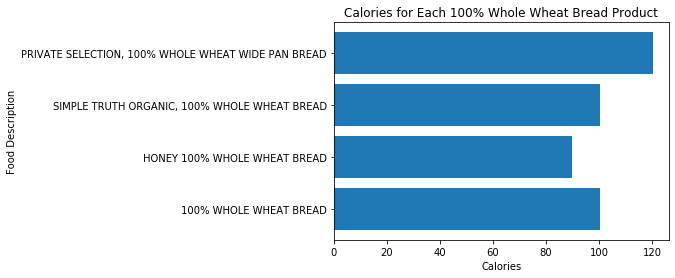

In [159]:
#Let's plot the calories on each product.
plt.barh(wwbread_Clean4.description, wwbread_Clean4.calories)
plt.xlabel('Calories')
plt.ylabel('Food Description')
plt.title('Calories for Each 100% Whole Wheat Bread Product')
plt.savefig('ww_calories.png', dpi=300, bbox_inches='tight')

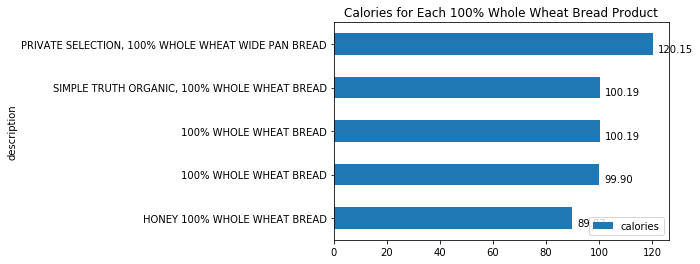

In [160]:
#Sort the plot by descending order of calories and show calorie values
ax = wwbread_Clean4.sort_values('calories', ascending=True).plot(kind='barh', x='description', y='calories',\
                    title='Calories for Each 100% Whole Wheat Bread Product')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 3), textcoords='offset points')

plt.savefig('ww_calories_order.png', dpi=300, bbox_inches='tight')

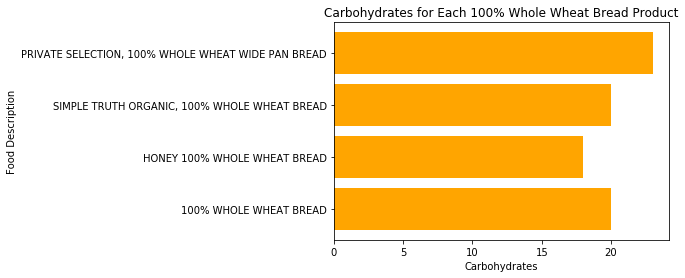

In [161]:
#Let's plot the carbohydrates on each product.
plt.barh(wwbread_Clean4.description, wwbread_Clean4.carbohydrates, color='orange')
plt.xlabel('Carbohydrates')
plt.ylabel('Food Description')
plt.title('Carbohydrates for Each 100% Whole Wheat Bread Product')
plt.savefig('ww_carb.png', dpi=300, bbox_inches='tight')

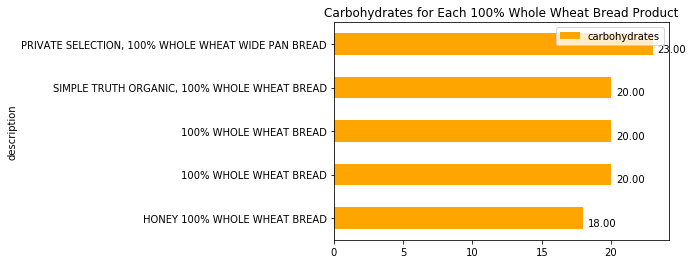

In [162]:
#Sort the plot by descending order of carbohydrates and show carbohydrate values
ax = wwbread_Clean4.sort_values('carbohydrates', ascending=True).plot(kind='barh', x='description', y='carbohydrates',\
                    title='Carbohydrates for Each 100% Whole Wheat Bread Product', color='orange')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 3), textcoords='offset points')

plt.savefig('ww_carbs_order.png', dpi=300, bbox_inches='tight')

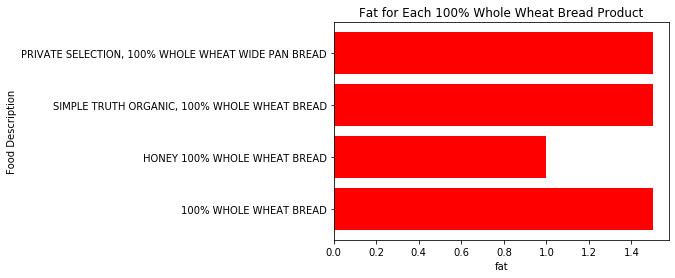

In [163]:
#Let's plot the fat on each product.
plt.barh(wwbread_Clean4.description, wwbread_Clean4.fat, color='red')
plt.xlabel('fat')
plt.ylabel('Food Description')
plt.title('Fat for Each 100% Whole Wheat Bread Product')
plt.savefig('ww_fat.png', dpi=300, bbox_inches='tight')

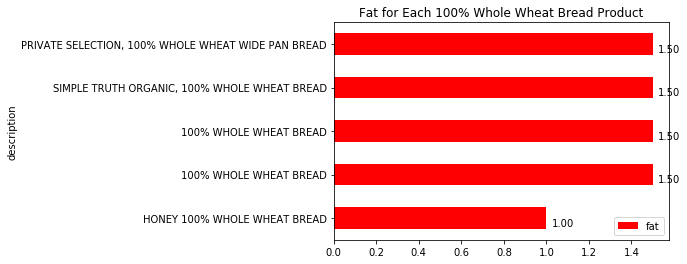

In [164]:
#Sort the plot by descending order of fat and show fat values
ax = wwbread_Clean4.sort_values('fat', ascending=True).plot(kind='barh', x='description', y='fat',\
                    title='Fat for Each 100% Whole Wheat Bread Product', color='red')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 3), textcoords='offset points')

plt.savefig('ww_fat_order.png', dpi=300, bbox_inches='tight')

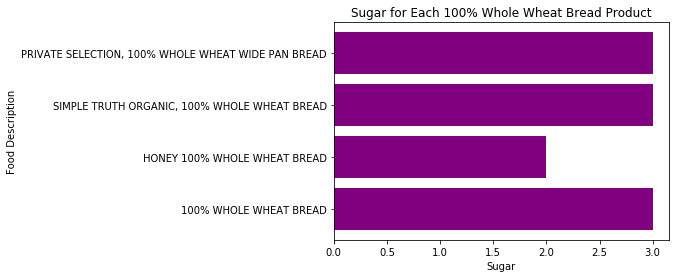

In [165]:
#Let's plot the sugars on each product.
plt.barh(wwbread_Clean4.description, wwbread_Clean4.sugars, color='purple')
plt.xlabel('Sugar')
plt.ylabel('Food Description')
plt.title('Sugar for Each 100% Whole Wheat Bread Product')
plt.savefig('ww_sugar.png', dpi=300, bbox_inches='tight')

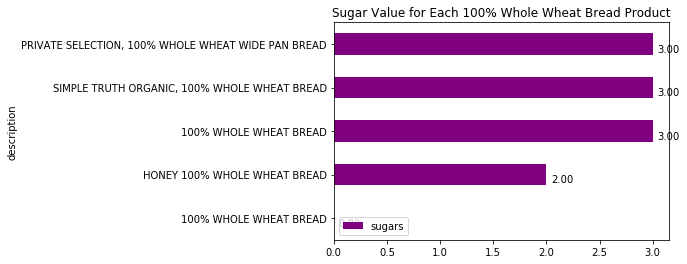

In [166]:
#Sort the plot by descending order of sugars and show sugar values
ax = wwbread_Clean4.sort_values('sugars', ascending=True).plot(kind='barh', x='description', y='sugars',\
                    title='Sugar Value for Each 100% Whole Wheat Bread Product', color='purple')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 3), textcoords='offset points')

plt.savefig('ww_sugar_order.png', dpi=300, bbox_inches='tight')

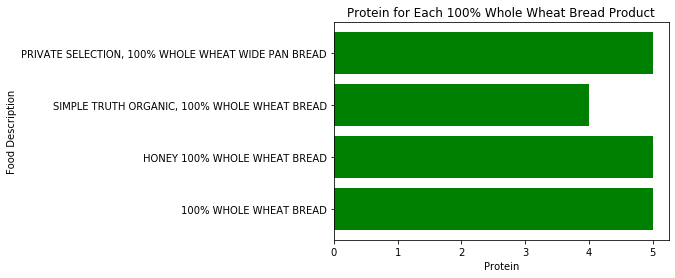

In [167]:
#Let's plot the protein on each product.
plt.barh(wwbread_Clean4.description, wwbread_Clean4.protein, color='green')
plt.xlabel('Protein')
plt.ylabel('Food Description')
plt.title('Protein for Each 100% Whole Wheat Bread Product')
plt.savefig('ww_protein.png', dpi=300, bbox_inches='tight')

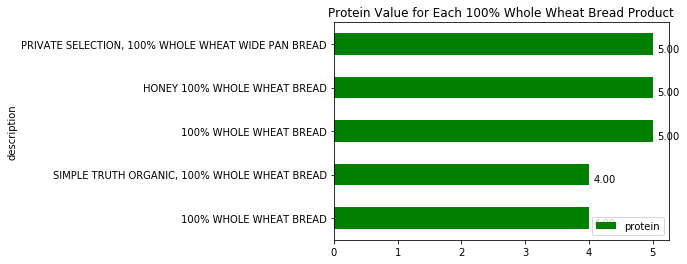

In [168]:
#Sort the plot by descending order of protein and show protein values
ax = wwbread_Clean4.sort_values('protein', ascending=True).plot(kind='barh', x='description', y='protein',\
                    title='Protein Value for Each 100% Whole Wheat Bread Product', color='green')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 3), textcoords='offset points')

plt.savefig('ww_protein_order.png', dpi=300, bbox_inches='tight')

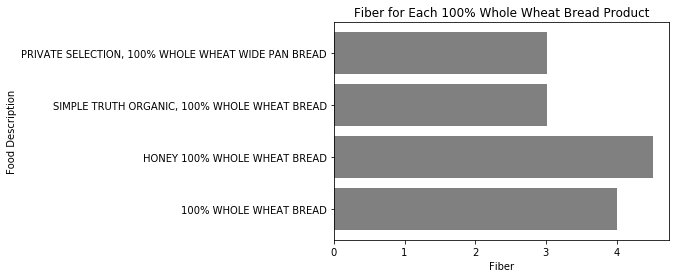

In [169]:
#Let's plot the fiber on each product.
plt.barh(wwbread_Clean4.description, wwbread_Clean4.fiber, color='gray')
plt.xlabel('Fiber')
plt.ylabel('Food Description')
plt.title('Fiber for Each 100% Whole Wheat Bread Product')
plt.savefig('ww_fiber.png', dpi=300, bbox_inches='tight')

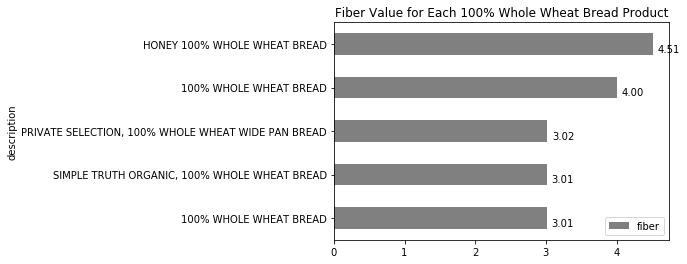

In [170]:
#Sort the plot by descending order of fiber and show fiber values
ax = wwbread_Clean4.sort_values('fiber', ascending=True).plot(kind='barh', x='description', y='fiber',\
                    title='Fiber Value for Each 100% Whole Wheat Bread Product', color='gray')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 3), textcoords='offset points')

plt.savefig('ww_fiber_order.png', dpi=300, bbox_inches='tight')

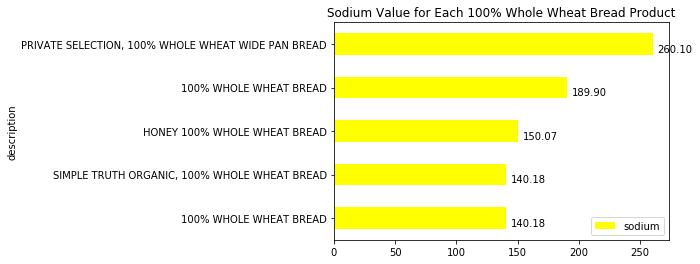

In [130]:
#Sort the plot by descending order of fiber and show fiber values
ax = wwbread_Clean4.sort_values('sodium', ascending=True).plot(kind='barh', x='description', y='sodium',\
                    title='Sodium Value for Each 100% Whole Wheat Bread Product', color='yellow')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 3), textcoords='offset points')

plt.savefig('ww_sodium_order.png', dpi=300, bbox_inches='tight')

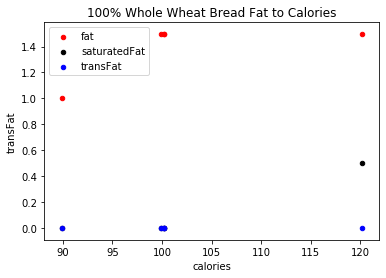

In [171]:
#Look to see if there is a pattern between fat, saturateFat, and transFat in calories
ax = wwbread_Clean4.plot(kind='scatter', x='calories', y='fat', color='red', label='fat', title='100% Whole Wheat Bread Fat to Calories')
wwbread_Clean4.plot(kind='scatter', x='calories', y='saturatedFat', color='black', label='saturatedFat', ax=ax)
wwbread_Clean4.plot(kind='scatter', x='calories', y='transFat', color='blue', label='transFat', ax=ax)
plt.savefig('ww_fats.png', dpi=300, bbox_inches='tight')

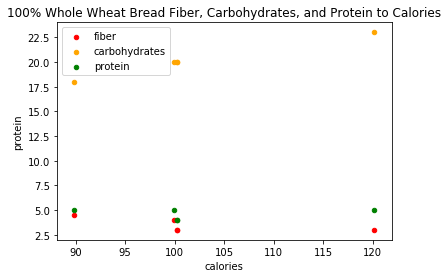

In [172]:
#Look at fiber, carbohydrates, and protin against calories
ax = wwbread_Clean4.plot(kind='scatter', x='calories', y='fiber', color='red', label='fiber', title='100% Whole Wheat Bread Fiber, Carbohydrates, and Protein to Calories')
wwbread_Clean4.plot(kind='scatter', x='calories', y='carbohydrates', color='orange', label='carbohydrates', ax=ax)
wwbread_Clean4.plot(kind='scatter', x='calories', y='protein', color='green', label='protein', ax=ax)
plt.savefig('ww_fibcarpro2cal.png', dpi=300, bbox_inches='tight')

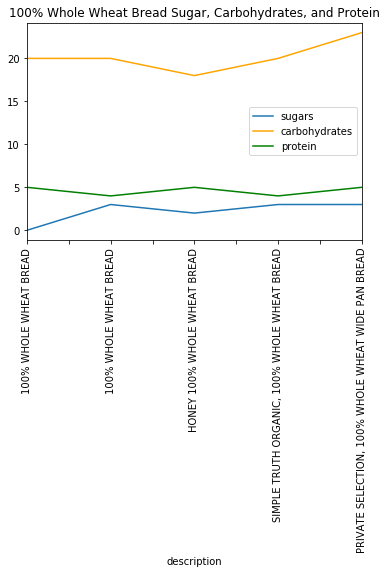

In [173]:
#Use this to compare values for sugars, carbohydrates, protein
ax = plt.gca()

wwbread_Clean4.plot(kind='line', rot='vertical', x='description', y='sugars', title='100% Whole Wheat Bread Sugar, Carbohydrates, and Protein', ax=ax)
wwbread_Clean4.plot(kind='line', rot='vertical', x='description', y='carbohydrates', color='orange', ax=ax)
wwbread_Clean4.plot(kind='line', rot='vertical', x='description', y='protein', color='green', ax=ax)
plt.savefig('ww_sugsodpro.png', dpi=300, bbox_inches='tight')
plt.show()

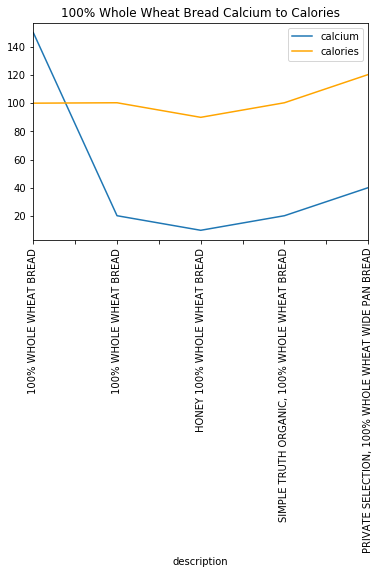

In [174]:
#Use this to compare values for calcium against calories
ax = plt.gca()

wwbread_Clean4.plot(kind='line', rot='vertical', x='description', y='calcium', title='100% Whole Wheat Bread Calcium to Calories', ax=ax)
wwbread_Clean4.plot(kind='line', rot='vertical', x='description', y='calories', color='orange', ax=ax)
plt.savefig('ww_calcal.png', dpi=300, bbox_inches='tight')
plt.show()

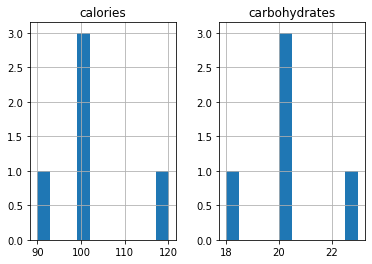

In [175]:
wwbread_Clean4[['calories', 'carbohydrates']].hist()
plt.savefig('ww_carcalHist.png', dpi=300, bbox_inches='tight')

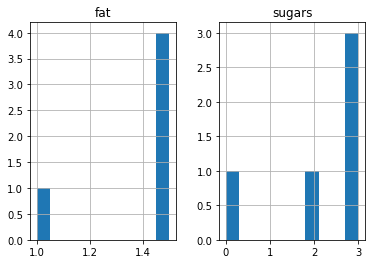

In [176]:
wwbread_Clean4[['fat', 'sugars']].hist()
plt.savefig('ww_fatsugHist.png', dpi=300, bbox_inches='tight')

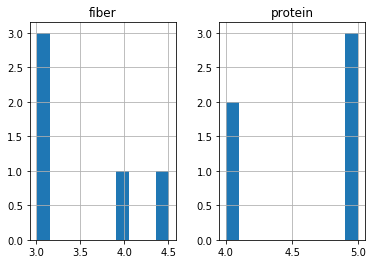

In [177]:
wwbread_Clean4[['protein', 'fiber']].hist()
plt.savefig('ww_profibHist.png', dpi=300, bbox_inches='tight')

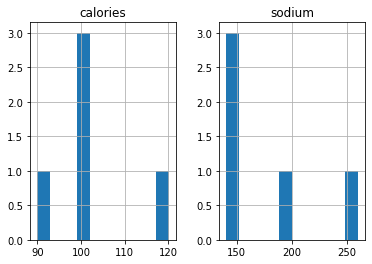

In [178]:
wwbread_Clean4[['sodium', 'calories']].hist()
plt.savefig('ww_sodcalHist.png', dpi=300, bbox_inches='tight')

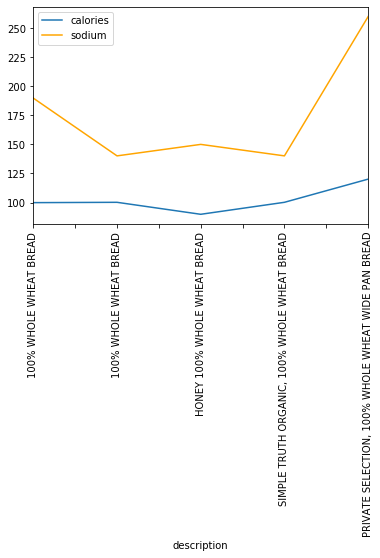

<Figure size 432x288 with 0 Axes>

In [132]:
#Use this to compare values for carbohydrates against calories
ax = plt.gca()

wwbread_Clean4.plot(kind='line', rot='vertical', x='description', y='calories', ax=ax)
wwbread_Clean4.plot(kind='line', rot='vertical', x='description', y='sodium', color='orange', ax=ax)
plt.show()
plt.savefig('ww_calsod.png', dpi=300, bbox_inches='tight')

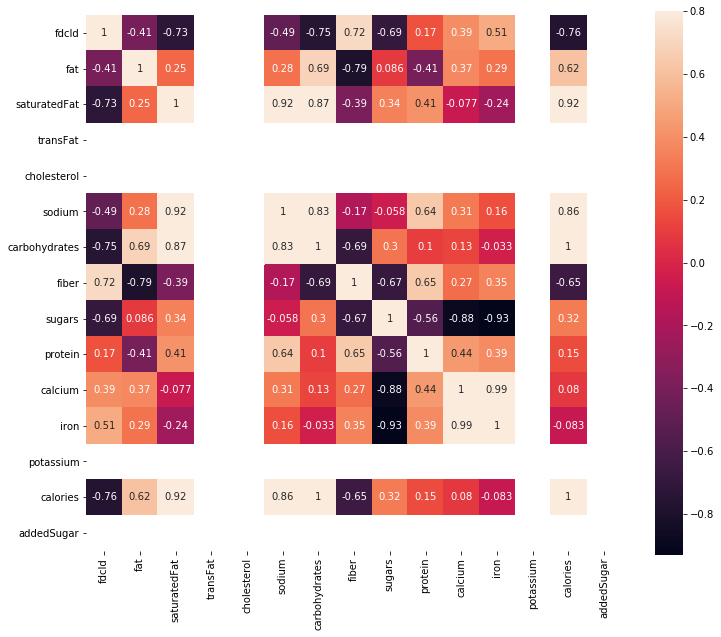

In [180]:
#Let's try a correlation matrix instead...
corrmat = wwbread_Clean4.corr()
f, ax = plt.subplots(figsize=(12,10)) #setting some parameters of the plot to help readability
sns.heatmap(corrmat, vmax = .8, square=True, annot=True)
plt.savefig('ww_corr.png', dpi=300, bbox_inches='tight')

Note, that there are zero values reported for transFat and cholesterol in all five 100% Whole Wheat Bread. That could indicate that those values should be further investigated to see if there is in fact zero transFat and cholesterol in 100% Whole Wheat Bread or that those nutritional values were not reported. Okay, moving on...

### Checking the gini impurity of the 100% Whole Wheat Bread data Frame
<br>
Unfortunately, the gini for 100% Whole Wheat Bread is negative! -1.36!!! Which proves my Machine Learning Decision Tree methods for the Whole Wheat Bread Data Frame is ineffective.
<br>
<br>I am sadly defeated by the decision tree capabilites. I am not going to be able to utilize the decision tree features to try to decide for me which food is healthier.

In [154]:
current_uncertainty = gini(wwbread_Clean4)
current_uncertainty

-1.3600000000000003

# Machine Learning Algorithm: CatBoost

CatBoost is a machine learning library that can handle categorical values without having to change the categorical values into numbers. Especially since the gini impurity proved 0.87 which is very high for the particular data I am dealing with and trying to create a decision tree proved challenging, I will use CatBoost. This will allow me to keep the high categorical columns intact without having to convert them into numbers. The following part of this project will apply the CatBoost train and test model on the sticky rice and whole bread data frames. I will iterate through the data set by assigning the data frames to test and train data sets. The iteration will tell us how the best test value. Then I will predict the calories using the test. In final, I will compare these values to the actual values for omparison purposes and to see how well the test did in predicting the caloric values.

Source: https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/

In [181]:
#Import libraries
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

In [182]:
#Look at sticky rice data frame data types
stickyrice_Clean4.dtypes

fdcId                     int64
description              object
dataType                 object
gtinUpc                  object
brandOwner               object
ingredients              object
fat                     float64
saturatedFat            float64
transFat                float64
cholesterol             float64
sodium                  float64
carbohydrates           float64
fiber                   float64
sugars                  float64
protein                 float64
calcium                 float64
iron                    float64
calories                float64
datePublished    datetime64[ns]
dtype: object

In [183]:
#Look at whole wheat bread data frame data types
wwbread_Clean4.dtypes

fdcId                     int64
description              object
dataType                 object
gtinUpc                  object
brandOwner               object
ingredients              object
fat                     float64
saturatedFat            float64
transFat                float64
cholesterol             float64
sodium                  float64
carbohydrates           float64
fiber                   float64
sugars                  float64
protein                 float64
calcium                 float64
iron                    float64
potassium               float64
calories                float64
addedSugar              float64
datePublished    datetime64[ns]
dtype: object

In [184]:
#Make stickyrice data train data and whole wheat bread data the test data
train = stickyrice_Clean4
test = wwbread_Clean4

In [185]:
#Creating a training set for modeling and validation set to check model performance
X = train.drop(['calories', 'datePublished'], axis=1)
y = train.calories

In [186]:
#Load libraries and split train data set into 70/20
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=1234)

In [187]:
#Check X data types again
X.dtypes

fdcId              int64
description       object
dataType          object
gtinUpc           object
brandOwner        object
ingredients       object
fat              float64
saturatedFat     float64
transFat         float64
cholesterol      float64
sodium           float64
carbohydrates    float64
fiber            float64
sugars           float64
protein          float64
calcium          float64
iron             float64
dtype: object

In [188]:
#Identify categorical columns (type: object)
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [189]:
#importing library and building model
from catboost import CatBoostRegressor
model=CatBoostRegressor(iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 176.7371810	test: 186.7194382	best: 186.7194382 (0)	total: 73.3ms	remaining: 3.59s
1:	learn: 169.9816871	test: 180.4800871	best: 180.4800871 (1)	total: 77.6ms	remaining: 1.86s
2:	learn: 163.6338033	test: 174.8927710	best: 174.8927710 (2)	total: 82ms	remaining: 1.28s
3:	learn: 157.6736348	test: 167.8316274	best: 167.8316274 (3)	total: 82.8ms	remaining: 952ms
4:	learn: 152.0759983	test: 161.1312499	best: 161.1312499 (4)	total: 83.6ms	remaining: 753ms
5:	learn: 146.0269652	test: 154.7020556	best: 154.7020556 (5)	total: 84.4ms	remaining: 619ms
6:	learn: 141.0201590	test: 148.6396086	best: 148.6396086 (6)	total: 85.2ms	remaining: 524ms
7:	learn: 136.3137764	test: 142.8776408	best: 142.8776408 (7)	total: 86ms	remaining: 452ms
8:	learn: 131.8895386	test: 137.3985423	best: 137.3985423 (8)	total: 86.8ms	remaining: 395ms
9:	learn: 127.2523808	test: 131.9174159	best: 131.9174159 (9)	total: 87.9ms	remaining: 351ms
10:	learn: 123.1310146	test: 126.9002641	best: 126.9002641 (10)	total: 88.

### Best test of the train data (sticky rice) was at the 49th iteration
<br>
Interestingly, the last iteration was the best. Does this indicate that more iterations would proove even better?
<br>
<br><b>NO</b> it doesn't. I tried 60 iterations and the best iteration was the second iteration at the best test value of 16.627. Which in comparison to the 50 iterations with the bestIterations at 49 and the bestTest at 43.257. A screen shot was saved for presentation purposes and can be found in the images folder on the GitHub site or within my powerpoint presentation.

### BTW... You can also scroll accross the model above as it is interactive! That is if you ran the code to output the plot.

In [190]:
# Pedict the calories for test data set and output to a csv.
submission = pd.DataFrame()
submission['fdcId'] = test['fdcId']
submission['description'] = test['description']
submission['calories'] = model.predict(test)
submission.to_csv("Submission.csv")

### The output of the csv will be compared to the calories previously provided from Food Data Central.
<br>
From there we can compare and contrast catboost's calorie prediction to the actual calories.

### Now let's run CatBoost but reverse the train and test data sets from the first CatBoost model.
<br>
Now the whole wheat bread data frame will be the train data set and the sticky rice data frame will be the test data set. In final we will also see the model fit and can compare that to the above model fit. We can also compare the test data (sticky rice) calorie output and compare that to the initial values too.

In [191]:
# This time make whole wheat bread data the train data and sticky rice data the test data
train = wwbread_Clean4 
test = stickyrice_Clean4

In [192]:
#Creating a training set for modeling and validation set to check model performance
X = train.drop(['calories', 'datePublished'], axis=1)
y = train.calories

In [193]:
#Load libraries and split train data set into 70/20
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=1234)

In [194]:
#Identify categorical columns (type: object)
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [195]:
#importing library and building model
from catboost import CatBoostRegressor
model=CatBoostRegressor(iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 4.7190730	test: 16.8326312	best: 16.8326312 (0)	total: 3.75ms	remaining: 184ms
1:	learn: 4.5781064	test: 16.7272930	best: 16.7272930 (1)	total: 4.38ms	remaining: 105ms
2:	learn: 4.4418150	test: 16.6265277	best: 16.6265277 (2)	total: 4.97ms	remaining: 77.9ms
3:	learn: 4.3100266	test: 16.7532601	best: 16.6265277 (2)	total: 9.52ms	remaining: 110ms
4:	learn: 4.3098509	test: 16.7582249	best: 16.6265277 (2)	total: 13.2ms	remaining: 118ms
5:	learn: 4.1823192	test: 16.8822188	best: 16.6265277 (2)	total: 13.8ms	remaining: 101ms
6:	learn: 4.0589719	test: 16.8191004	best: 16.6265277 (2)	total: 14.3ms	remaining: 88ms
7:	learn: 3.9396560	test: 16.9380594	best: 16.6265277 (2)	total: 14.9ms	remaining: 78.1ms
8:	learn: 3.8242247	test: 17.0544756	best: 16.6265277 (2)	total: 15.4ms	remaining: 70.4ms
9:	learn: 3.7125368	test: 17.1683830	best: 16.6265277 (2)	total: 16ms	remaining: 64.1ms
10:	learn: 3.6044568	test: 17.2798169	best: 16.6265277 (2)	total: 16.6ms	remaining: 58.8ms
11:	learn: 3.49985

In [196]:
# Pedict the outcome for test data set and output to a csv.
submission2 = pd.DataFrame()
submission2['fdcId'] = test['fdcId']
submission2['description'] = test['description']
submission2['calories'] = model.predict(test)
submission2.to_csv("Submission2.csv")

## EDA on Standard Reference Legacy (2018) Macronutrient Lists:
<br>
Based on the available data on macronutrients, I will explore the data sets and highlight nutritional values to take into consideration when considering to consume certain foods. The different macronutrient information available and the items that contain the highest measured macronutrient will also be consdiered for future analysis. These macronutrients should be taken into future consideration based on individual macronutrients needed in a daily diet. More often than not, we may concentrate on consuming more macronutrients from one category other another category. As mentioned, every person has there own nutritional needs and dietary restrictions so this information may not apply to all. Overall, it is interesting information to consider. 
<br>
source: https://www.nal.usda.gov/fnic/nutrient-lists-standard-reference-legacy-2018

In [197]:
#Try to load the carbohydrate.csv file download to see what each csv contains:

carbs_df = pd.read_csv("macronutrients/carbohydrate.csv", header = 1)

In [198]:
carbs_df.head()

Description           Measure  \
0  Syrups, table blends, pancake, with 2% maple, ...          1.0 cups   
1                      Syrups, table blends, pancake          1.0 cups   
2  Rice, white, long-grain, regular, raw, unenriched          1.0 cups   
3                     Beans, pink, mature seeds, raw          1.0 cups   
4  Desserts, mousse, chocolate, prepared-from-recipe  1.0 recipe yield   

   Carbohydrate, by difference(g)Per Measure  
0                                     219.24  
1                                     193.02  
2                                     147.91  
3                                     134.80  
4                                     129.85

In [199]:
carbs_df[:2]

Description   Measure  \
0  Syrups, table blends, pancake, with 2% maple, ...  1.0 cups   
1                      Syrups, table blends, pancake  1.0 cups   

   Carbohydrate, by difference(g)Per Measure  
0                                     219.24  
1                                     193.02

### Syrups (table blends, pancake, and those with 2% maple)
Contain the highest <b>Carbohydrates</b> based on the Nutrient List from Standard Reference Legacy (2018).
<br>The second highest carbohydrate item is also another form of syrup.
<br>
<br>This is good to know because that means there will be less syrup consumption in my house.

In [155]:
#Try to load the Polyunsaturated fat file download to see what each cdv contains:

polyunsatfat_df = pd.read_csv("macronutrients/polyunsat_fat.csv", header = 1)

In [156]:
polyunsatfat_df.head()

Description   Measure  \
0                            Nuts, butternuts, dried  1.0 cups   
1  Seeds, sunflower seed kernels, toasted, withou...  1.0 cups   
2  Seeds, sunflower seed kernels, oil roasted, wi...  1.0 cups   
3       Peanuts, valencia, oil-roasted, without salt  1.0 cups   
4  Seeds, pumpkin and squash seed kernels, roaste...  1.0 cups   

   Fatty acids, total polyunsaturated(g)Per Measure  
0                                            51.289  
1                                            50.259  
2                                            46.297  
3                                            25.592  
4                                            23.430

In [202]:
polyunsatfat_df[:2]

Description   Measure  \
0                            Nuts, butternuts, dried  1.0 cups   
1  Seeds, sunflower seed kernels, toasted, withou...  1.0 cups   

   Fatty acids, total polyunsaturated(g)Per Measure  
0                                            51.289  
1                                            50.259

### Nutes (butternuts, and dried) 
Contain the highest <b>Polyunsaturated Fats</b> based on the Nutrient List from Standard Reference Legacy (2018). Nuts are followed closely by Seeds as the second highest Polyunsaturated fats.

In [203]:
#Try to load the Protein file download to see what each cdv contains:

protein_df = pd.read_csv("macronutrients/protein.csv", header = 1)

In [204]:
protein_df.head()

Description                  Measure  \
0             Beverages, Whey protein powder isolate                3.0 scoop   
1    Chicken, gizzard, all classes, cooked, simmered  1.0 cup chopped or dice   
2                     Beans, pink, mature seeds, raw                  1.0 cup   
3  Fish, yellowtail, mixed species, cooked, dry heat               0.5 fillet   
4                    Beans, black, mature seeds, raw                  1.0 cup   

   Protein(g)Per Measure  
0                  50.00  
1                  44.07  
2                  44.02  
3                  43.32  
4                  41.90

In [205]:
protein_df[:2]

Description                  Measure  \
0           Beverages, Whey protein powder isolate                3.0 scoop   
1  Chicken, gizzard, all classes, cooked, simmered  1.0 cup chopped or dice   

   Protein(g)Per Measure  
0                  50.00  
1                  44.07

### Beverages (Whey protein powder isolate) 
Contain the highest <b>Protein</b> based on the Nutrient List from Standard Reference Legacy (2018).
<br> At only 3 protein scoops, Whey outbeats 1 cup dice chicken in protein value.

In [206]:
#Try to load the Saturated fat file download to see what each cdv contains:

satfat_df = pd.read_csv("macronutrients/sat_fat.csv", header = 1)

In [207]:
satfat_df.head()

Description            Measure  \
0  Desserts, mousse, chocolate, prepared-from-recipe   1.0 recipe yield   
1  Beef, Australian, imported, grass-fed, seam fa...             4.0 oz   
2                       Cream, fluid, heavy whipping  1.0 cups, whipped   
3                                   Cheese, muenster    1.0 cups, diced   
4  Cheese, cheddar (Includes foods for USDA's Foo...    1.0 cups, diced   

   Fatty acids, total saturated(g)Per Measure  
0                                      73.940  
1                                      30.040  
2                                      27.638  
3                                      25.229  
4                                      24.904

In [208]:
satfat_df[:2]

Description           Measure  \
0  Desserts, mousse, chocolate, prepared-from-recipe  1.0 recipe yield   
1  Beef, Australian, imported, grass-fed, seam fa...            4.0 oz   

   Fatty acids, total saturated(g)Per Measure  
0                                       73.94  
1                                       30.04

### Desserts (mouse, chocolate, prepared-from-recipe) 
Contain the highest <b>Saturated fats</b> based on the Nutrient List from Standard Reference Legacy (2018). Interestingly, the second highest saturated fat item is Beef (Australian, imported, grass-fed, etc.) follow with a small portion size of 4 oz containing 30.04 grams of total saturated fat.

In [209]:
#Try to load the Total Dietary Fiber file download to see what each cdv contains:

fiber_df = pd.read_csv("macronutrients/total_dietary_fiber.csv", header = 1)

In [210]:
fiber_df.head()

Description  \
0                              Corn bran, crude   
1  Gums, seed gums (includes locust bean, guar)   
2                      Fungi, Cloud ears, dried   
3                          Spices, curry powder   
4                      Spices, cinnamon, ground   

   Fiber, total dietary(g)Per 100 g  
0                              79.0  
1                              77.3  
2                              70.1  
3                              53.2  
4                              53.1

In [211]:
fiber_df[:2]

Description  \
0                              Corn bran, crude   
1  Gums, seed gums (includes locust bean, guar)   

   Fiber, total dietary(g)Per 100 g  
0                              79.0  
1                              77.3

### Corn bran (crude) 
Contain the highest <b>Fiber</b>based on the Nutrient List from Standard Reference Legacy (2018). It is followed by some type of Gums, in particular, seed gums of some sort. I am unsure of the crude part which could indicate some type of corn bran.

In [212]:
#Try to load the Total Sugar file download to see what each cdv contains:

sugar_df = pd.read_csv("macronutrients/total_sugar.csv", header = 1)

In [213]:
sugar_df.head()

Description           Measure  \
0  Desserts, mousse, chocolate, prepared-from-recipe  1.0 recipe yield   
1                                 Whey, sweet, dried          1.0 cups   
2                             Currants, zante, dried          1.0 cups   
3                 Cranberry sauce, canned, sweetened          1.0 cups   
4  Orange juice, frozen concentrate, unsweetened,...          1.0 cups   

   Sugars, total(g)Per Measure  
0                       119.66  
1                       107.97  
2                        89.68  
3                        87.95  
4                        77.76

In [214]:
sugar_df[:2]

Description           Measure  \
0  Desserts, mousse, chocolate, prepared-from-recipe  1.0 recipe yield   
1                                 Whey, sweet, dried          1.0 cups   

   Sugars, total(g)Per Measure  
0                       119.66  
1                       107.97

### Desserts (mouse, chocolate, prepared-from-recipe) 
Makes the list again! Desserts now contain the highest <bSugar</b> and the highest in <b>Saturated Fats</b> based on the Nutrient List from Standard Reference Legacy (2018). It is followed up by Whey, sweet, dried. Which I am unsure of that form of Whey, but it comes in second in the <b>Sugar</b> category.

In [215]:
#Try to load the Total Kilocalories file download to see what each cdv contains:

TotalKcal_df = pd.read_csv("macronutrients/Total_Kcal.csv", header = 1)

In [216]:
TotalKcal_df.head()

Description  \
0  Desserts, mousse, chocolate, prepared-from-recipe   
1  Pie crust, deep dish, frozen, unbaked, made wi...   
2  Pie crust, deep dish, frozen, baked, made with...   
3     Candies, confectioner's coating, peanut butter   
4     Pie Crust, Cookie-type, Chocolate, Ready Crust   

                          Measure  Energy (kcal)Per Measure  
0                1.0 recipe yield                      1818  
1  1.0 pie crust (average weight)                      1053  
2  1.0 pie crust (average weight)                      1052  
3                  1.0 cups chips                       889  
4                       1.0 crust                       881

In [217]:
TotalKcal_df[:2]

Description  \
0  Desserts, mousse, chocolate, prepared-from-recipe   
1  Pie crust, deep dish, frozen, unbaked, made wi...   

                          Measure  Energy (kcal)Per Measure  
0                1.0 recipe yield                      1818  
1  1.0 pie crust (average weight)                      1053

### Desserts (mouse, chocolate, prepared-from-recipe) 
Comes in once again as the highest <b>Kcal</b>! Or rather kilo calories total to burn using the energy of 1818 per a kilo calorie based on the Nutrient List from Standard Reference Legacy (2018). It is followed by the second second highest Kcal item Pie crust varieties above listed in the head data.

Feel free to Google kcal energy if you want but here are a few interesting sites that break down how much energy is based on burning the calories you consumer:

https://www.livestrong.com/article/311197-how-many-calories-does-one-kcal-equal/<br>
https://www.medicalnewstoday.com/articles/263028
<br>
Overall, "1 kcal is equal to 1,000 cal." and daily caloric intake for individuals are different depending on life style factors, such as, physical activity, weight, gender, height, overall health. As I mentioned before, nutritional needs are unique to individuals.

## Short attempt at trying to run R in Jupyter Notebook along with Python

The following extensions are needed to work with Python and R within a single Jupyter Notebook. This means I will try to switch back and fourth from Python and R as needed within this project assignment. The versitility is helpful in seeing experimental and exploratory data analysis on the nutritional data from FoodData Central. We can also compare the visualizations from python to R. If anything, we are showing how it is possible to use both Python and R within Jupyter Notebook.

In [218]:
%load_ext rpy2.ipython
#This extension is required to use R and python within a single Jupyter notebook.

In [219]:
#You will encounter plenty of warning using R and Python interchangabley.
#To turn off warnings, run the following code:

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=RRuntimeWarning)

In [220]:
import rpy2.rinterface
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

In [221]:
#This allows us to easily move data between pandas dataframe and R. 
#For (automatic) translation of Pandas to R import the following.

from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

In [222]:
%%R
#Tells the notebook to run this code in R

### Jupyter Magic
There are magic commands which make it easier to mix R and Python in Jupyter Notebook.

In [223]:
#Enable R magic with the following code:
#
# %load_ext rpy2.ipython
#
# %R - line magic (return value as Python object)
# %%R - cell magic (no return value but can pass data in and out)
#
#Arguments:
# -i - input variable(s)
# -o - ouput variable(s)
# -h - height of plot
# -w - width of plot

### To access built-in variables in R:

In [224]:
%R
#
#Don't be confused with ".": this is not the Python dot operator! It's just part of the variable name in R.
#R uses the $ like the dot "." operator in Python but for R.
#This is in-line R code (asking for version of R) from R.

In [225]:
# Check if data frame is still available
stickyrice_Clean4.head()

fdcId                       description dataType       gtinUpc  \
0  703030                       STICKY RICE  Branded  782733012269   
1  555829                 STICKY-RICE CHIPS  Branded  859908003480   
2  393840           THAI STICKY PURPLE RICE  Branded  188244000090   
3  670578  COCONUT CRUNCH STICKY-RICE CHIPS  Branded  859908003503   
4  732062  SAVORY SEAWEED STICKY-RICE CHIPS  Branded  859908003695   

                       brandOwner  \
0  Preferred Brands International   
1                  Dang Foods LLC   
2         Alter Eco Americas Inc.   
3                  Dang Foods LLC   
4                  Dang Foods LLC   

                                         ingredients  fat  saturatedFat  \
0                    WATER, ORGANIC LONG GRAIN RICE.  0.0          0.00   
1  ORGANIC RICE, PALM FRUIT OIL+, CANE SUGAR, WAT...  7.0          3.00   
2  100% ORGANIC HOM MALI JASMINE RICE* AND 100% O...  0.5          2.26   
3  STICKY RICE, PALM FRUIT OIL, COCONUT CHIPS (CO...  6.0          3.50   
4  STICKY RICE, PALM FRUIT OILâ€ , CANE SUGAR, WA...  7.0          3.00   

   transFat  cholesterol  sodium  carbohydrates  fiber  sugars  protein  \
0      0.00         0.00   11.20           49.0   0.56    0.00      3.0   
1      0.00         0.00  140.00           19.0   0.00    2.00      1.0   
2      0.08         9.82    4.80           37.0   1.01    4.37      4.0   
3      0.00         0.00  124.88           19.0   1.01    6.00      1.0   
4      0.00         0.00  269.92           18.0   0.00    2.00      2.0   

   calcium  iron  calories datePublished  
0     0.00  0.36    210.00    2019-12-06  
1     0.00  0.00    140.00    2019-04-01  
2    24.48  0.85    169.92    2019-04-01  
3     3.92  0.30    140.00    2019-12-06  
4     3.92  0.20    140.00    2019-12-06

In [226]:
%%R -i stickyrice_Clean4
#Pass the dataframe to R using the -i option for %%R

ValueError: Buffer for this type not yet supported.

There goes our first error in trying to pass the Python sticky rice data frame into R. Let's see if we can still access the data frame even after the error message.

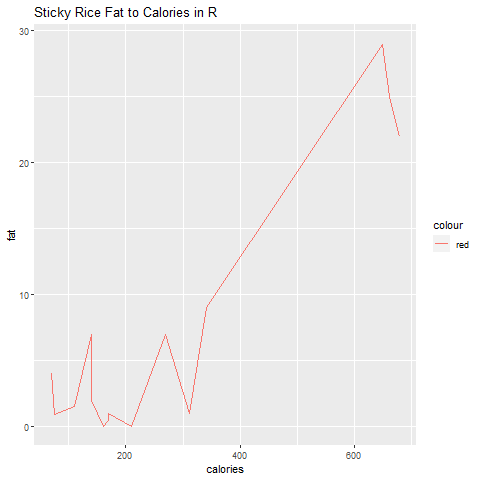

In [248]:
%%R

install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)
ggplot(stickyrice_Clean4, aes(x=calories, y=fat, colour="red")) + labs(title="Sticky Rice Fat to Calories in R") + geom_line()

Oh WOW! Even with the massive error message in passing the data frame to R, we were still able to access the data frame and plot values from the sticky rice data frame. Interesting.....
<br>
<br>Let's do the same and pass the whole wheat brbead data frame to R and plot as well.

In [228]:
%%R -i wwbread_Clean4
#Pass the dataframe to R using the -i option for %%R

ValueError: Buffer for this type not yet supported.

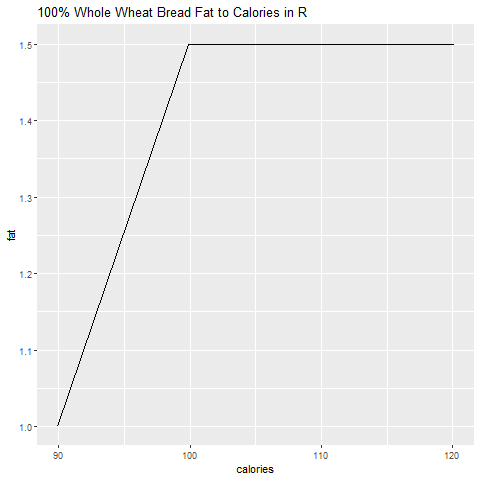

In [247]:
%%R 

install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)
ggplot(wwbread_Clean4, aes(x=calories, y=fat)) + labs(title="100% Whole Wheat Bread Fat to Calories in R") + geom_line()

Okay, so it seems to plot accordingly with the errors. We will conduct a comparison with our presentations just for the purpose of showing R work along with a Python data frame in a Jupyter Notebook.
<br>
<br>Now let's try another plot.

In [230]:
%%R -w 900 -h 400 -i stickyrice_Clean4

library(ggplot2)

ggplot(stickyrice_Clean4, aes(x = calories, y = fat)) +
    geom_point(size = 3, color = 'blue')+
    geom_smooth(method = 'lm', color = 'red', lty = 'dashed') +
    theme_classic(base_size = 16)

ValueError: Buffer for this type not yet supported.

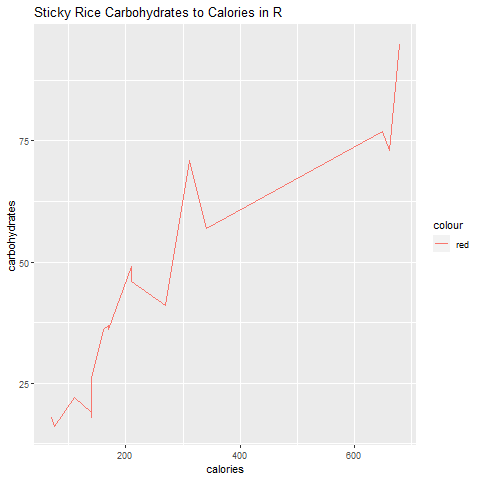

In [246]:
%%R

#Let's just plot using the previous method and look at carbohydrates to calories

install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)
ggplot(stickyrice_Clean4, aes(x=calories, y=carbohydrates, colour="red")) + labs(title="Sticky Rice Carbohydrates to Calories in R") + geom_line()

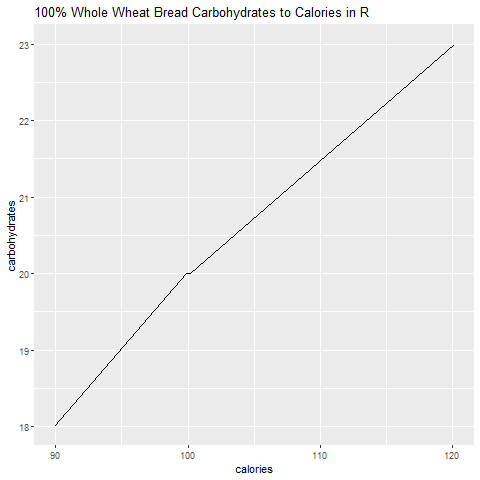

In [243]:
%%R

#Let's just plot using the previous method and look at carbohydrates to calories

install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)
ggplot(wwbread_Clean4, aes(x=calories, y=carbohydrates)) + labs(title="100% Whole Wheat Bread Carbohydrates to Calories in R") + geom_line()

## End of attempt of R in Jupyter Notebook!

Now that I have played around enough and ran into enough error messages, let's consider moving on. I later learned that rpy2 is no longer supporting its services for windows. It is also no longer compatible with numpy version 1.17. This could be a result to why I kept encountering so many error messages. Such as: Buffer for this type not yet supported. At least now we know that there is some ways to mix Python and R in a single Jupyter Notebook.
<br>
<br>It has come for the time to close out this project.

# Summary of FoodData Central Data Science Practicum I Project

### Original Goal: Are We Really Consuming the Healthiest Food?
<br>

### <u><b>What Objective's did I meet?</b></u>
<br>
In looking back at the Research Questions, did I come to some answers?<br>
<br>
* <b>So Are we making the healthiest food choices?</b><br>
Well, we can make healthy food choice if we want to and now that we know more about the highest macronutrients; we can try our best to consume less syrup and desserts such as chocolate mouse..haha!<br>
<br>
* <b>What does nutritional value in food really mean?</b><br>
It means we get energy from the nutrients within our food so it’s important for us to be knowledgeable on what we eat and what is in the food we eat.<br>
<br>
* <b>Are we eating nutritious food or are we eating what is easy, fast, and cheap?</b><br>
Well I usually eat certain types of food if it tastes good, what ever the price it may be. So I didn’t get price values of the foods with my sticky rice and 100% Whole wheat bread food items from FoodData Central. But that could be a future endeavor if cost was of concern.<br>
<br>
* <b>Is our food selection based on nutritional values or for other reasons?</b><br> 
Our food should be based on nutritional values or at least as I mentioned before, we all have our own dietary needs and health needs. Therefore, we should be knowledgeable about what we eat.<br>
<br>

### <u><b>Primary Question in this project:</b></u> 
<br>
* <b>What if we could look take the nutritional values of a type of food, and then compare those values to see if our choice of food is the healthiest for us or if a healthier option is available?</b>
<br>
In fact, we did succeed at this. We learned 100% whole wheat bread is healthier than sticky rice. And the honey 100% whole wheat bread had the lowest sugars, highest protein, and lowest carbohydrate values. It also had the lowest calories.<br>
<br>
We looked at a number of Visualizations from my EDA process and compared my findings.
I attempted to apply two Machine Learning Algorithms: the Decision Tree and CatBoost library but both were unsuccessful.
<br>

### <u><b>What did I learn? What challenges did I encounter?</b></u>
<br>
•	I learned that exploratory data analysis takes a great amount of time to synthesize. Therefore, I should allow myself ample time for EDA!<br>
•	Cleaning data is a hassle when dealing with centralize data.<br>
•	I had to deal with differing unique values, foreign keys, and a number of varying attributes that was a challenge to pull together.<br>
•	I also learned to take the time to breath and not overthink each piece of code that I write.<br>
•	I also got to play with coding Python and R within a single Jupyter Notebook. That was fun! I wish I could have done more of it.<br>

### <u><b>Conclusion</b></u>
This project and the data within this project became a large feat to overcome. It all resulted in a small dataset to bring information to light on nutritional data. If time were not of the essence, I could have conducted multiple food searches to emphasize the potential of the data and information being pulled from FoodData Central. However, I would like to think this was a huge accomplishment.<br>
<br>
<b>So, where do we go from here?</b>
<br>
We continue on to be more conscientious of our food consumption and the nutritional values. Or perhaps what can come next is if someone can create a method that can retrieve the nutritional data through an app. Could it be possible to scan the bar code on a food label and have the app return healthier alternatives? That would neat!

### <u><b>References and Sources</b></u>

CatBoost documentation https://catboost.ai/

Center for Disease Control (CDC). (2018, October 30). NHANES Questionnaires, Datasets, and Related Documentation. CDC/National Center for Health Statistics. Retrieved from https://wwwn.cdc.gov/nchs/nhanes/default.aspx

Hsu, J. (2019, September 26). How To Flatten a Dictionary With Nested Lists and Dictionaries in Python. Retrieved from https://medium.com/better-programming/how-to-flatten-a-dictionary-with-nested-lists-and-dictionaries-in-python-524fd236365

pandas.DataFrame.plot documentation https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

Ray, S. (2017, August 14). CatBoost: A machine learning library to handle categorical (CAT) data automatically. © Copyright 2013-2020 Analytics Vidhya. Retrieved from https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/

Rpy2 Documentation https://rpy2.github.io/doc/v2.9.x/html/index.html

U.S. Department of Agriculture, Agricultural Research Service. FoodData Central, 2019. fdc.nal.usda.gov.

U.S. Department of Agriculture (USDA), Agricultural Research Service. FoodData Central: Foundation Foods. Version Current: December 2019. Internet: fdc.nal.usda.gov.

U.S. Department of Agriculture (USDA), Agricultural Research Service. FoodData Central: USDA Global Branded Food Products Database. Version Current: July 2018. Internet: fdc.nal.usda.gov.

U.S. Department of Agriculture (USDA). (n.d.). Download FoodData Central Data. Retrieved from https://fdc.nal.usda.gov/download-datasets.html

U.S. Department of Agriculture (USDA). (2018). Nutrient List from Standard Reference Legacy (2018).  Retrieved from https://www.nal.usda.gov/fnic/nutrient-lists-standard-reference-legacy-2018

U.S. Department of Agriculture (USDA). (2019, October 17.). What's In The Foods You Eat Search Tool, 2015-2016. Retrieved from https://www.ars.usda.gov/northeast-area/beltsville-md-bhnrc/beltsville-human-nutrition-research-center/food-surveys-research-group/docs/whats-in-the-foods-you-eat-emsearch-toolem/

U.S. Department of Agriculture (USDA). (2019, October 17.). What's In The Foods You Eat Search Tool, 2015-2016. Retrieved from https://reedir.arsnet.usda.gov/codesearchwebapp/(S(lou5yebe332endidvuoarlyu))/CodeSearch.aspx

Yandex. (n.d.). CatBoost is a high-performance open source library for gradient boosting on decision trees. © 2020 Yandex. Retrieved from https://catboost.ai/